In [1]:
"""This notebook explores customer churn prediction using a structured analysis of the dataset. It includes data exploration, 
feature analysis, and statistical methods to identify key predictors of churn. Following the analysis, various machine learning models 
are trained and evaluated to predict customer retention."""

'This notebook explores customer churn prediction using a structured analysis of the dataset. It includes data exploration, \nfeature analysis, and statistical methods to identify key predictors of churn. Following the analysis, various machine learning models \nare trained and evaluated to predict customer retention.'

In [2]:
# importing libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns= None
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as ss

In [3]:
# reading the data
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')
data = df.copy()

In [4]:
print(f'shape of the dataframe is {data.shape}')

shape of the dataframe is (10000, 18)


In [5]:
data.columns.to_series().groupby(data.dtypes).groups   

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender', 'Card Type']}

In [6]:
data.info() # there is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
data[data.duplicated()]
# we have no duplicated rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [8]:
"""from previous explortion, the data has no missing values, no duplicates and of shape (10000, 18).there are 3 columns that do not contrbute
to the problem of customer churn rate which are (RowNumber, CustomerId, Surname)."""

'from previous explortion, the data has no missing values, no duplicates and of shape (10000, 18).there are 3 columns that do not contrbute\nto the problem of customer churn rate which are (RowNumber, CustomerId, Surname).'

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


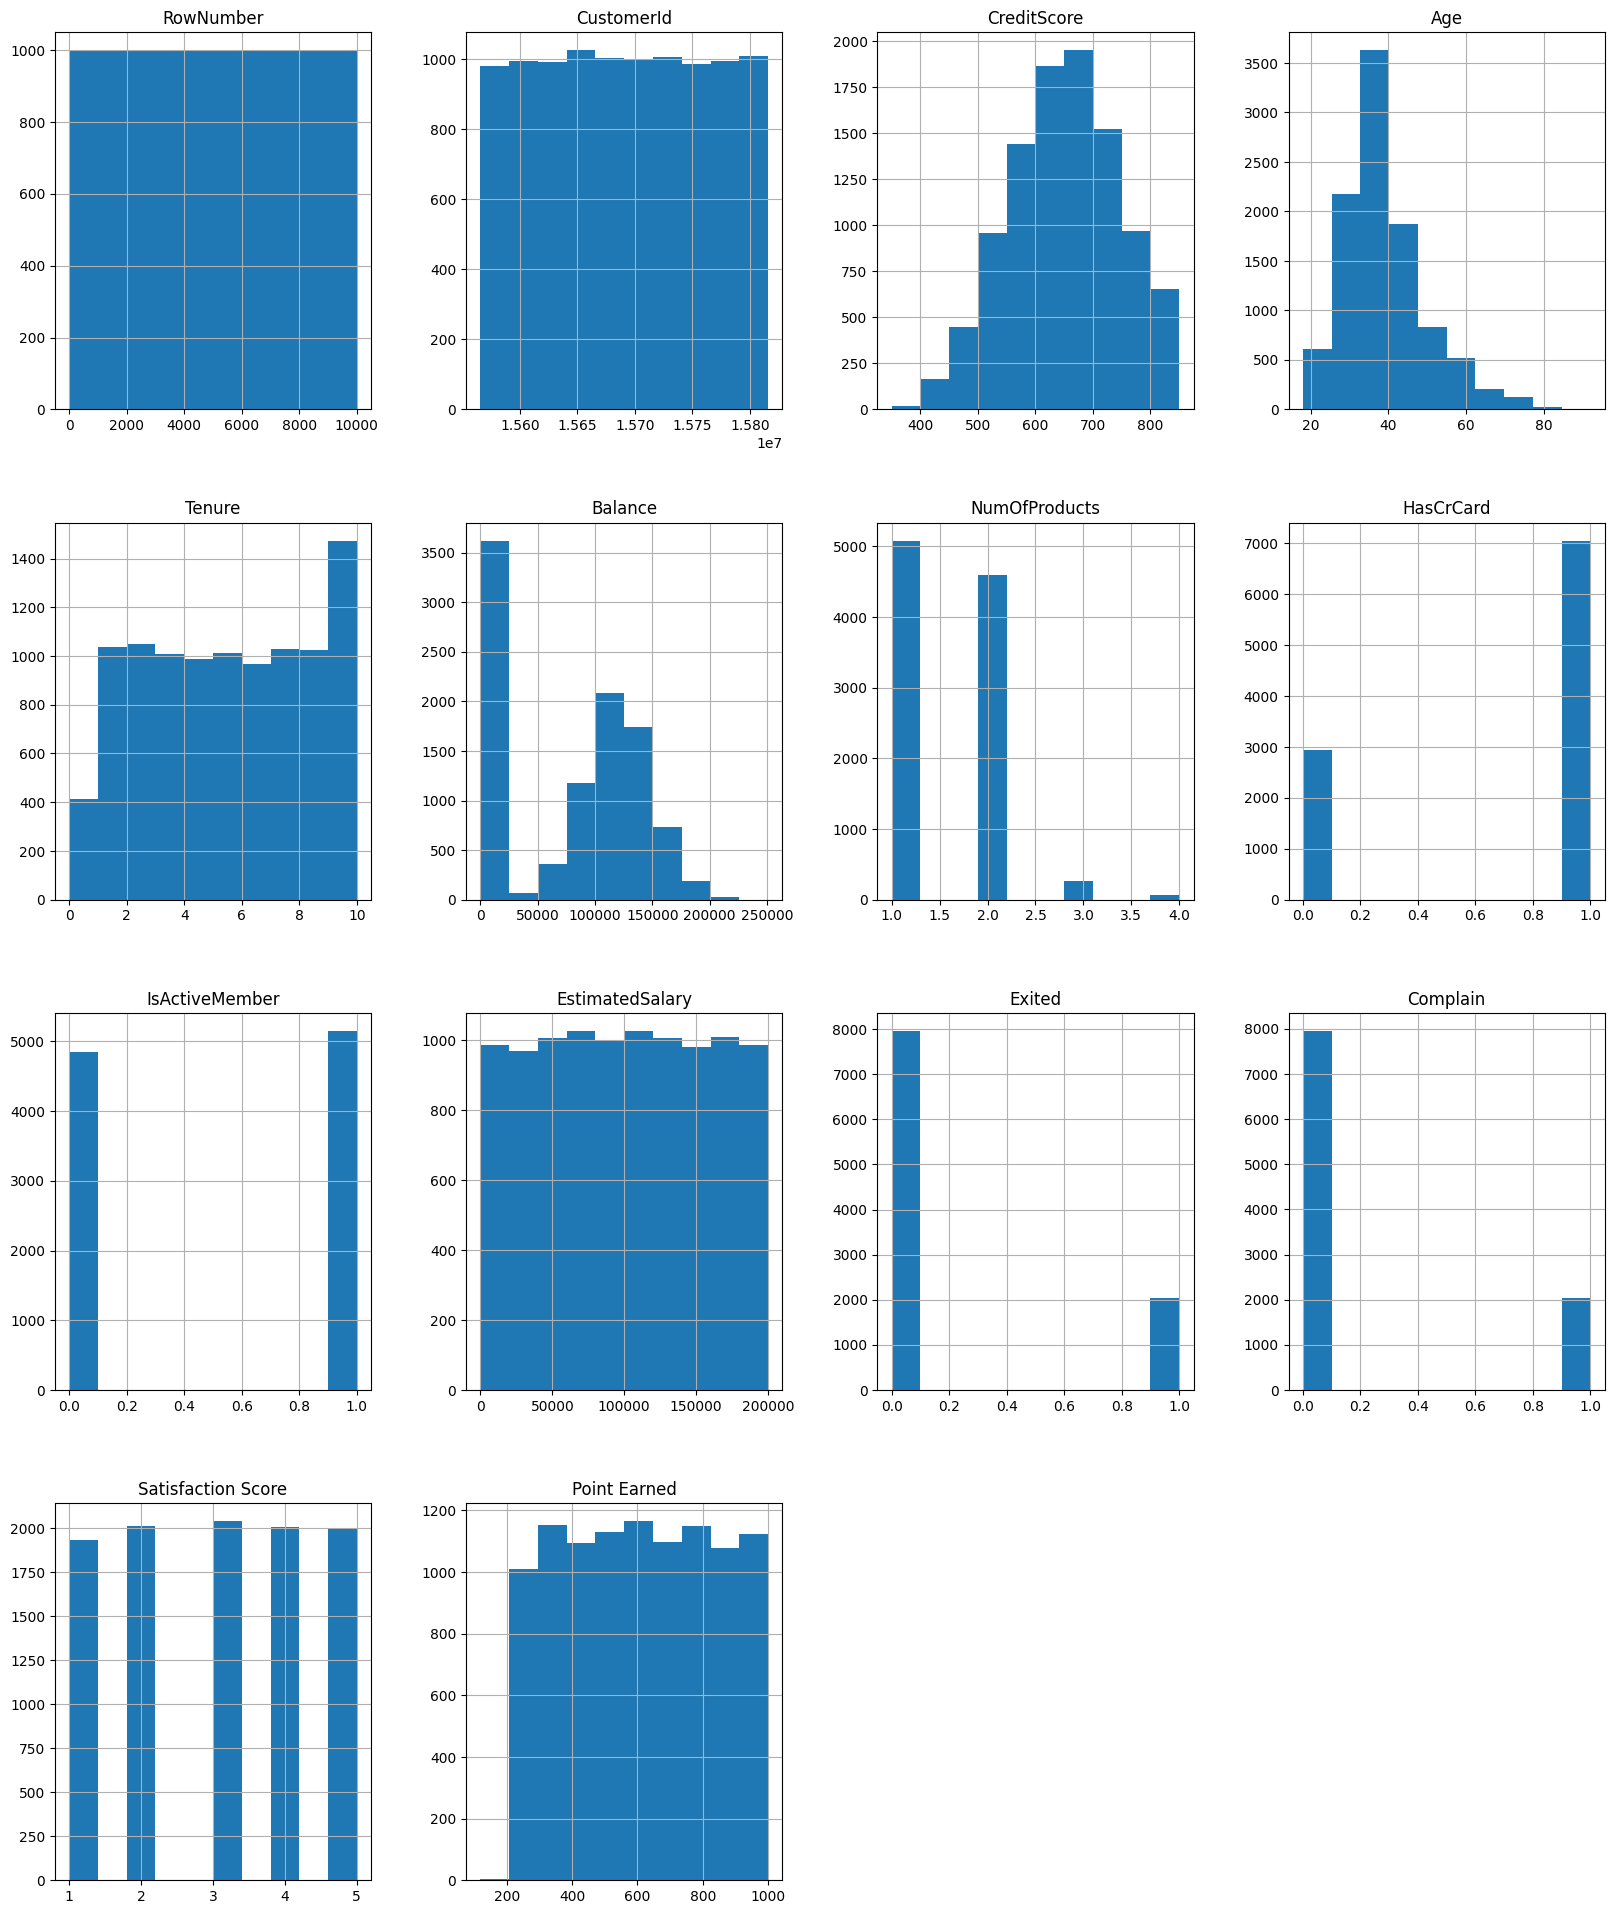

In [10]:
# plotting the histograms for integers and floating columns
data.hist(figsize=(20, 24))
plt.show()

Value counts for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64




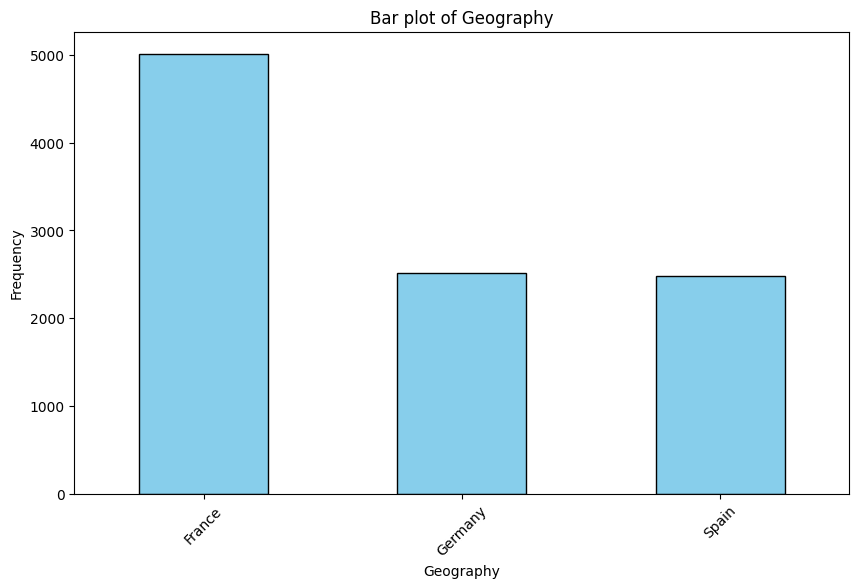

Value counts for Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64




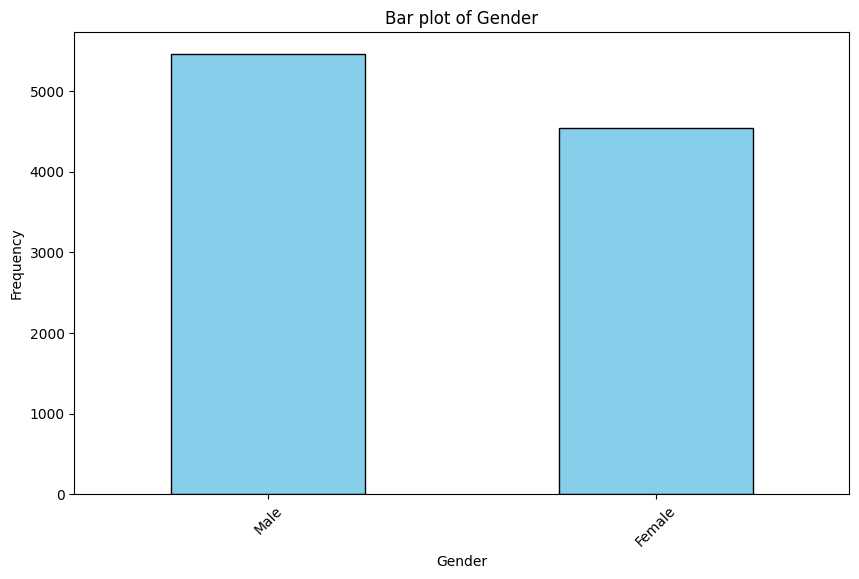

Value counts for Card Type:
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64




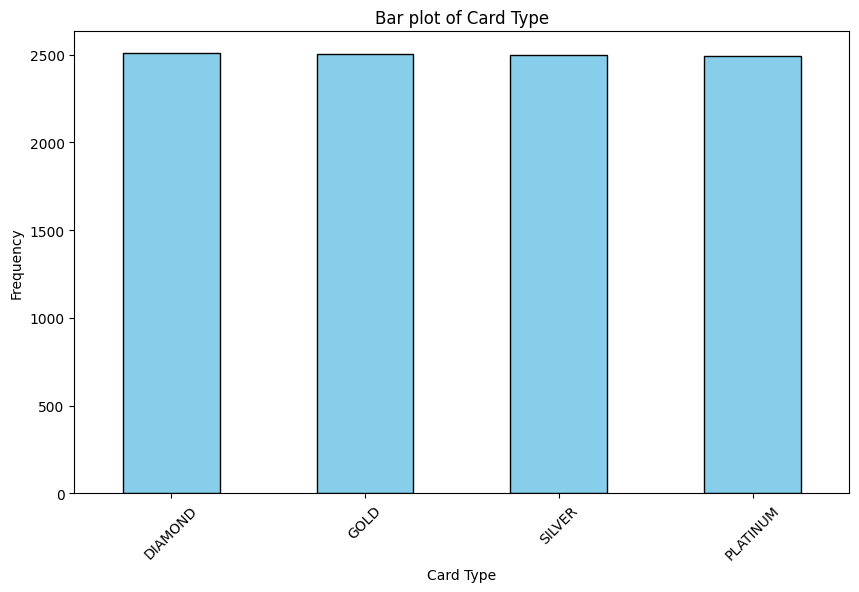

In [11]:
# investigating object columns
obje_columns = ['Geography', 'Gender', 'Card Type']

for column in obje_columns:
    if column in data.columns:
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")
        
        plt.figure(figsize=(10, 6))
        data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Bar plot of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  
        plt.show()
    else:
        print(f"Column {column} does not exist in the DataFrame.")

In [12]:
"""from features distributions we can see that we have 10 categorical features whether they are integer or objects and 5 continous features +
the 3 mentioned features that do not contribute to the problem for the object categorical features, the data is almost equal in terms of 
gender(male, female) and card types(diamond, gold, silver, platinum)"""

'from features distributions we can see that we have 10 categorical features whether they are integer or objects and 5 continous features +\nthe 3 mentioned features that do not contribute to the problem for the object categorical features, the data is almost equal in terms of \ngender(male, female) and card types(diamond, gold, silver, platinum)'

In [13]:
# Investigating the target variable
churn_counts = data['Exited'].value_counts()
churn_percentages = (churn_counts / len(data)) * 100

print("Number of customers by churn status:")
print(churn_counts)
print("\nPercentage of customers by churn status:")
for index, percentage in churn_percentages.items():
    print(f"{index}: {percentage:.2f}%")

Number of customers by churn status:
Exited
0    7962
1    2038
Name: count, dtype: int64

Percentage of customers by churn status:
0: 79.62%
1: 20.38%


In [14]:
# dropping unnecessatry features
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.shape

(10000, 15)

In [15]:
# We will split the data into continous features and categorical features (object and integers) Investigating the continuous features only
con_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']
data[con_features].describe()

# note that the minimum and the first quartile for Balance feature are zeros which will lead us later to further analysis

,CreditScore,Age,Balance,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,250898.090000,199992.480000,1000.000000


In [16]:
"""From previous results we can conclude that the continous features has no outliers but we will check them 
   further using modified Z-score.
   
   We will only check Age, CreditScore and Balance columns because the EstimatedSalary and Point Earned is almost 
   uniform feature which have no outliers as there is no central tendency of the data so the mean of a uniform 
   distribution is not the best guess to the value of the next observation, in the following links this idea of 
   uniform distribution will be explained clearly 
   'https://www.researchgate.net/post/Why-does-Uniform-Distributions-have-no-outliers'
   'https://en.wikipedia.org/wiki/Kurtosis'   
   
    For checking for outliers in the other three columns, we will use 'Median Absolute Deviation' because the 
    Balance feature is 'Bimodal Distribution' has a significant peak with a large proportion of values 
    concentrated around 0, and a more normal distribution beyond this range. 
    
    The standard deviation is sensitive to this skew and the long tail. Therefore,the Median Absolute Deviation is used as it is 
    more robust to outliers and provides a clearer measure of dispersion for Bimodal distributions
    integrated into the modified Z-score version.
    
    Although the summary statistics for Age and CreditScore seems to be reasonable and they have no outliers
    but we will check them too"""


def modified_z_score(series):
    median = series.median()
    mad = ss.median_abs_deviation(series, scale='normal')
    return 0.6745 * (series - median) / mad


for feature in ['CreditScore', 'Age', 'Balance']:
    z_scores = modified_z_score(data[feature])
    outliers = data[abs(z_scores) > 3.5]
    
    print(f'Feature: {feature}')
    print(f'Number of Outliers: {outliers.shape[0]}')
    print(f'Percentage of Outliers: {100 * outliers.shape[0] / data.shape[0]:.2f}%')
    print()
# the results show no outliers to the data

Feature: CreditScore
Number of Outliers: 0
Percentage of Outliers: 0.00%

Feature: Age
Number of Outliers: 6
Percentage of Outliers: 0.06%

Feature: Balance
Number of Outliers: 0
Percentage of Outliers: 0.00%



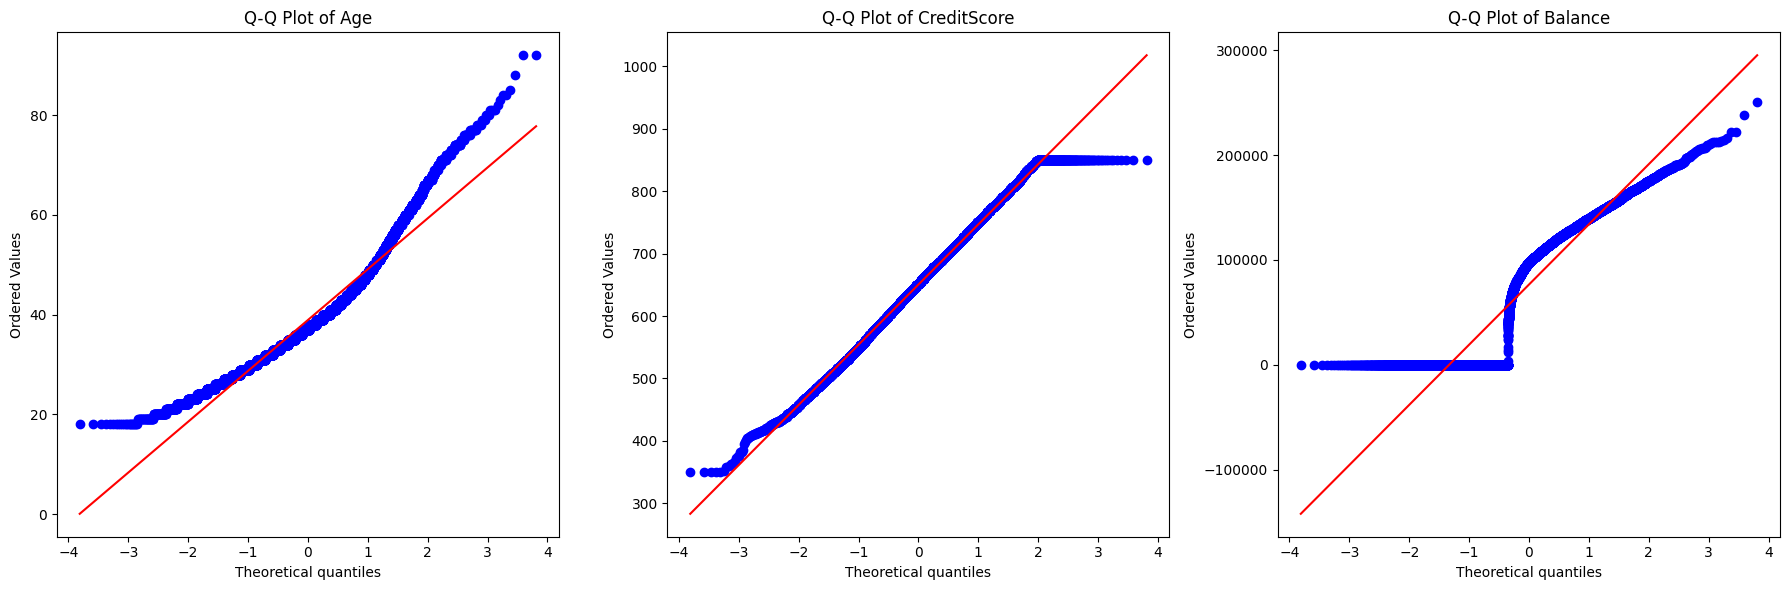

'We can observe here that:\n     1- CreditScore is almost a perfect normal distributionwith a very slight negatively skewness \n     2- Age feature is closer to postive skew distribution than normal distribution\n     3- There is an issue in the Balance feature because of the high left peak\n   \n   We will investigate the Age and Balance features further regarding their relationship with the target'

In [17]:
# we will check the normality for each of the 3 columns using q-q plot 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

ss.probplot(data['Age'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of Age')

ss.probplot(data['CreditScore'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of CreditScore')

ss.probplot(data['Balance'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot of Balance')

plt.tight_layout()
plt.show()


"""We can observe here that:
     1- CreditScore is almost a perfect normal distributionwith a very slight negatively skewness 
     2- Age feature is closer to postive skew distribution than normal distribution
     3- There is an issue in the Balance feature because of the high left peak
   
   We will investigate the Age and Balance features further regarding their relationship with the target"""

In [18]:
# investigating the non-continuos features
all_features = data.columns.tolist()

cat_features = [feature for feature in all_features if feature not in con_features]
print(cat_features, len(cat_features))

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type'] 10



Percentage of unique categories for Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Percentage of leavers by Geography:
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


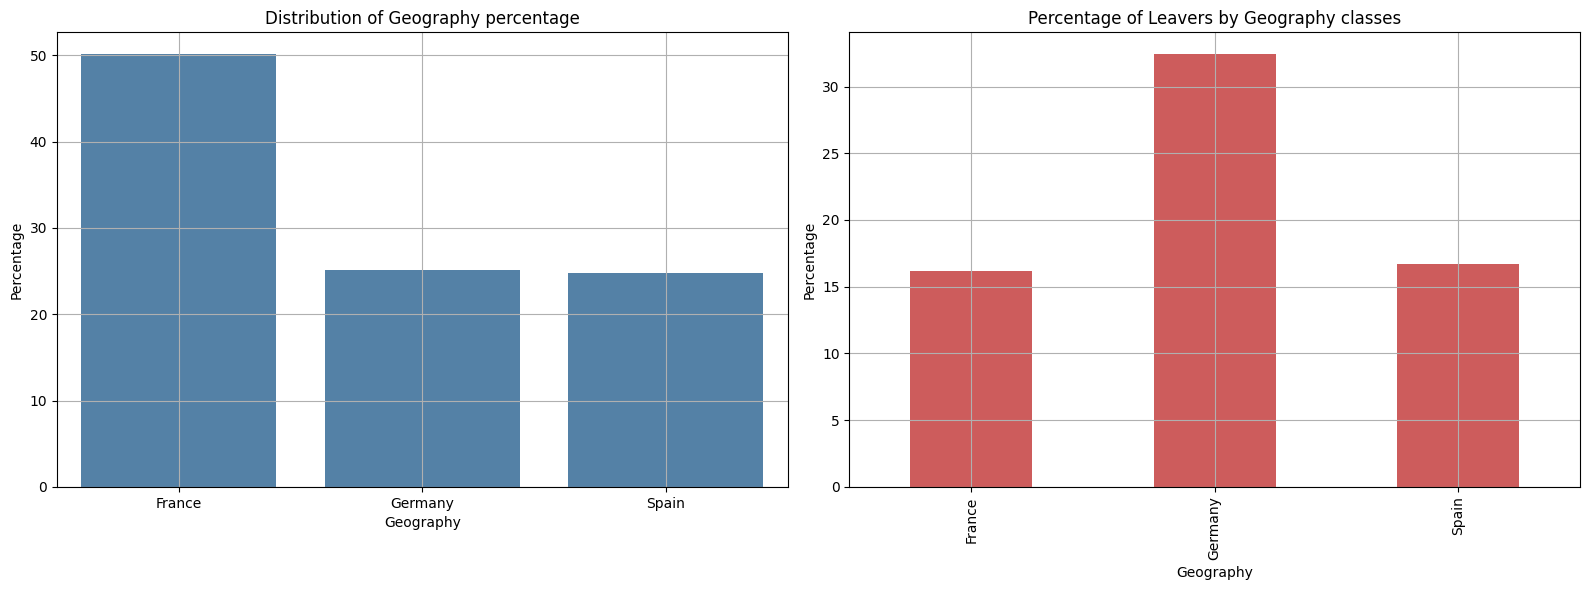


Percentage of unique categories for Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Percentage of leavers by Gender:
Gender
Male      16.474253
Female    25.071539
Name: Exited, dtype: float64


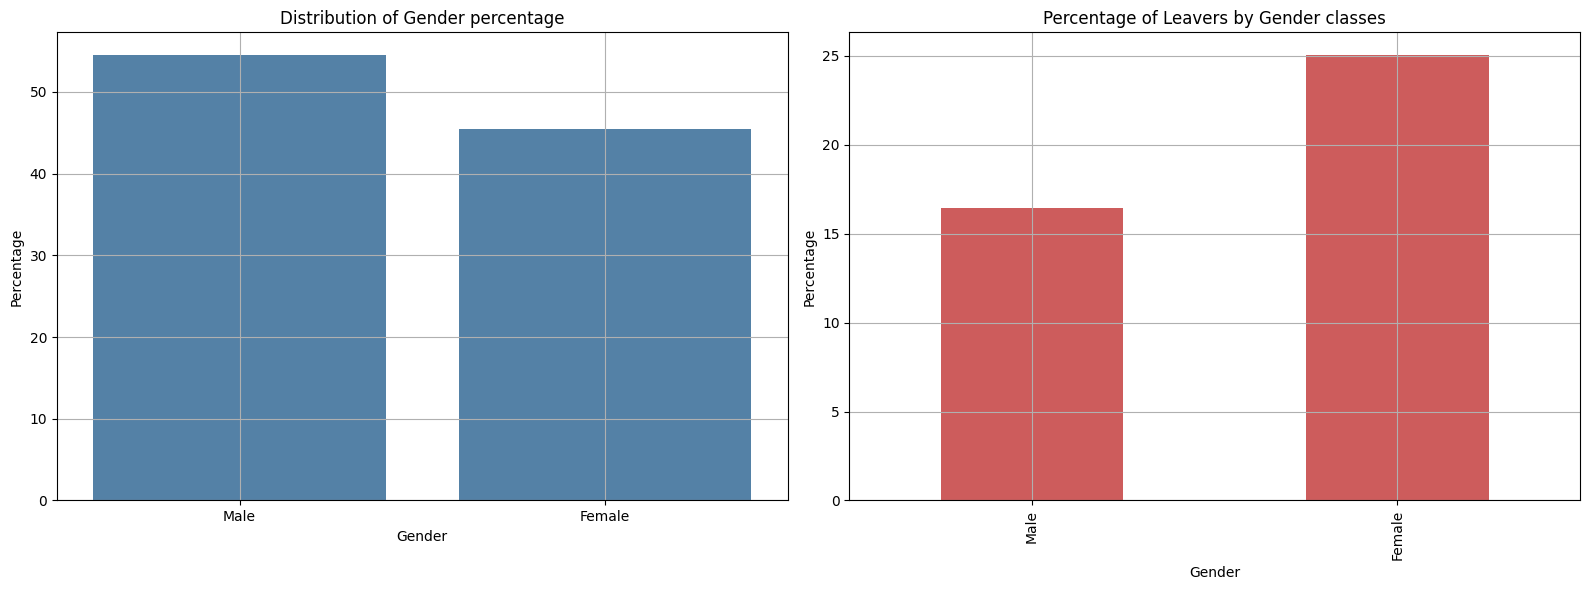


Percentage of unique categories for Tenure:
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64

Percentage of leavers by Tenure:
Tenure
2     19.179389
1     22.415459
7     17.217899
8     19.219512
5     20.652174
3     21.110010
4     20.525784
9     21.747967
6     20.268873
10    20.612245
0     23.002421
Name: Exited, dtype: float64


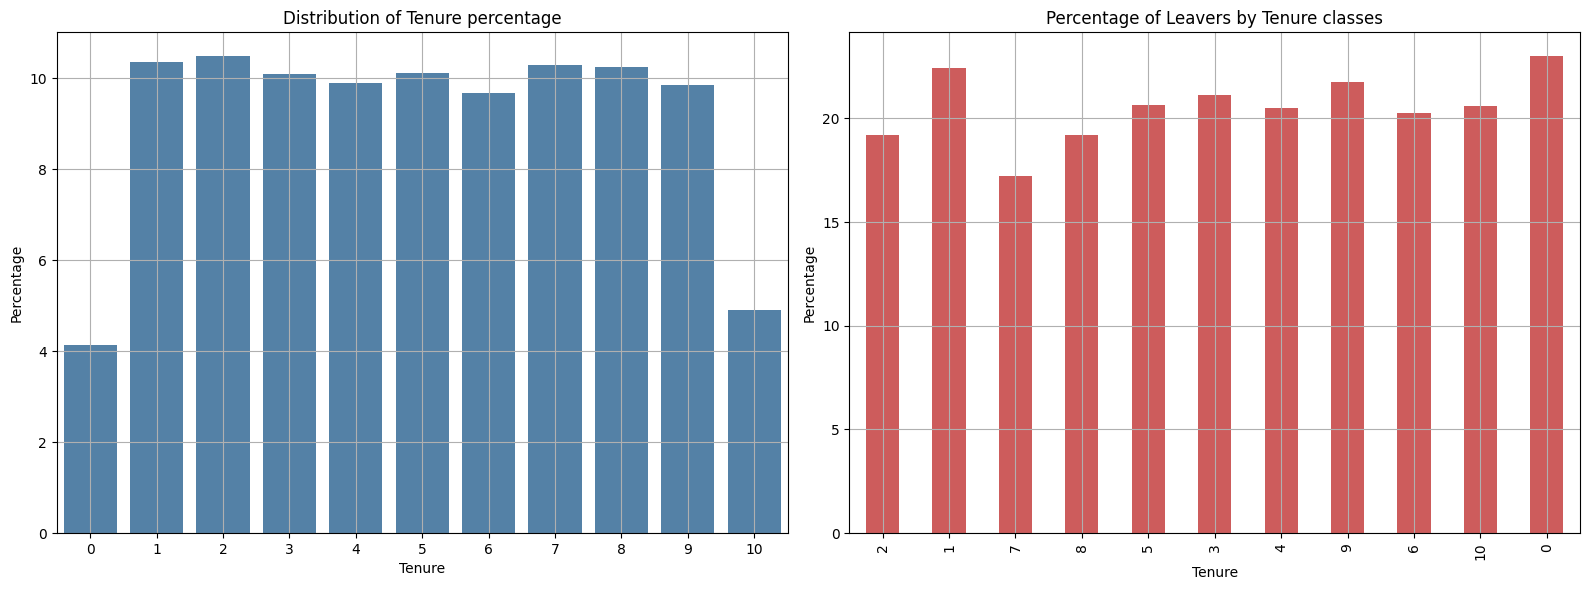


Percentage of unique categories for NumOfProducts:
NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

Percentage of leavers by NumOfProducts:
NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


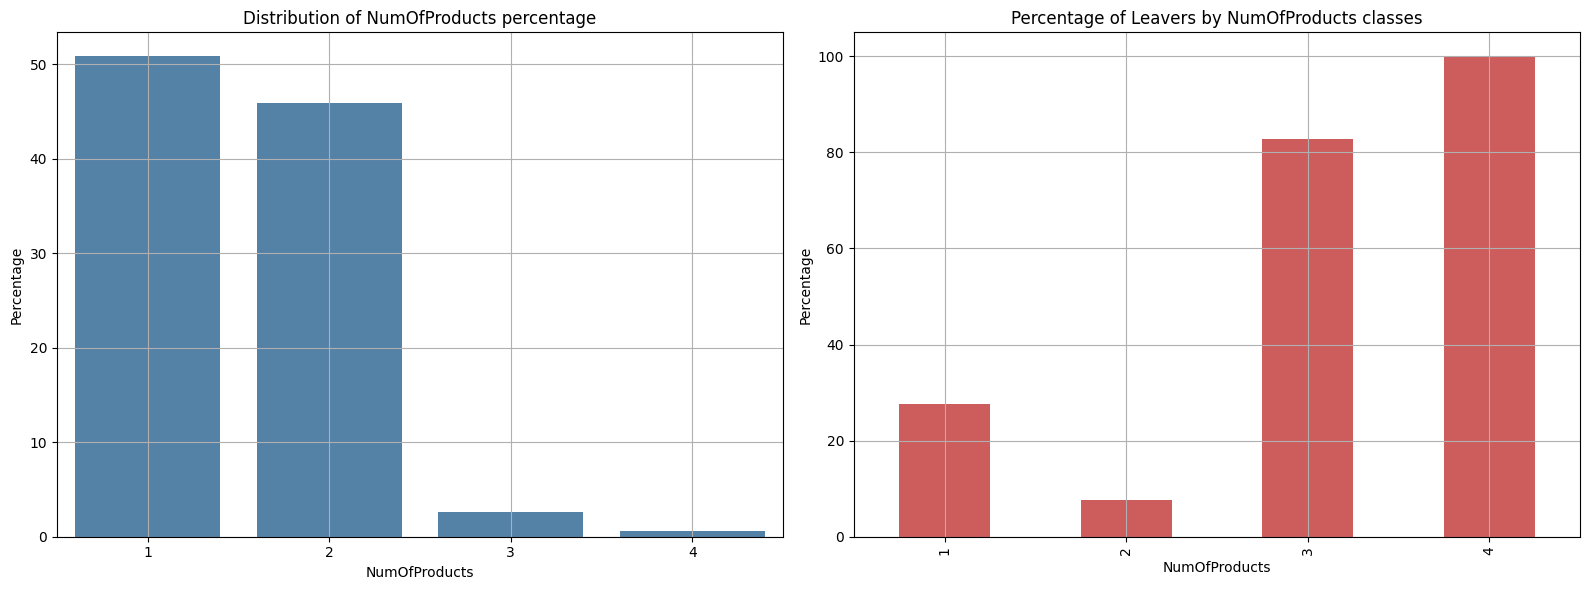


Percentage of unique categories for HasCrCard:
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

Percentage of leavers by HasCrCard:
HasCrCard
1    20.198441
0    20.814941
Name: Exited, dtype: float64


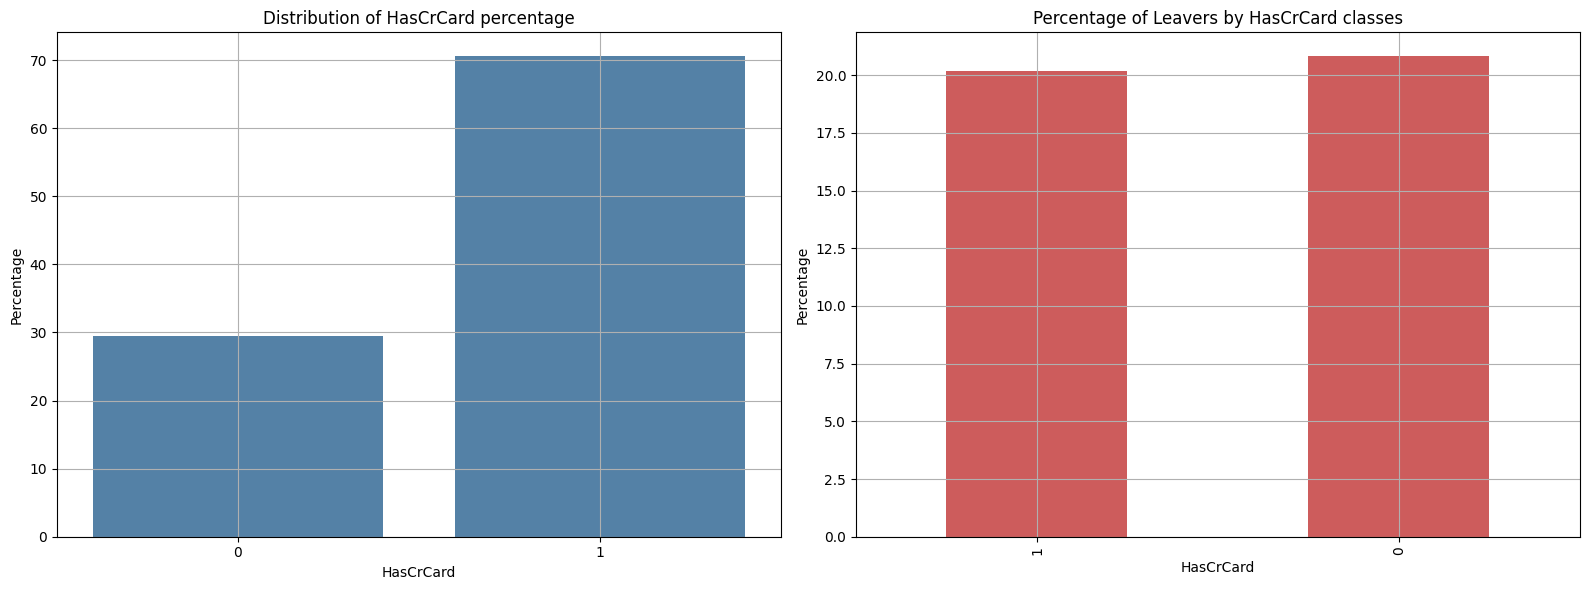


Percentage of unique categories for IsActiveMember:
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64

Percentage of leavers by IsActiveMember:
IsActiveMember
1    14.269074
0    26.871520
Name: Exited, dtype: float64


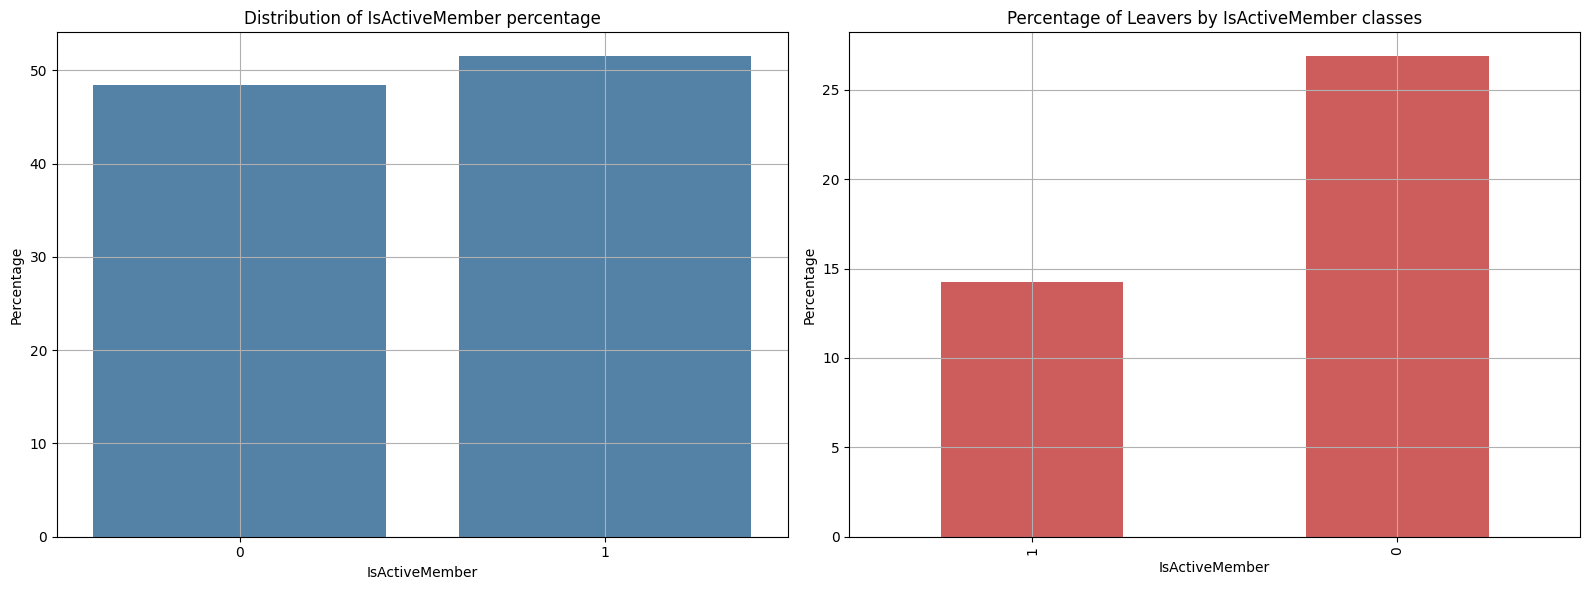


Percentage of unique categories for Exited:
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

Percentage of leavers by Exited:
Exited
0      0.0
1    100.0
Name: Exited, dtype: float64


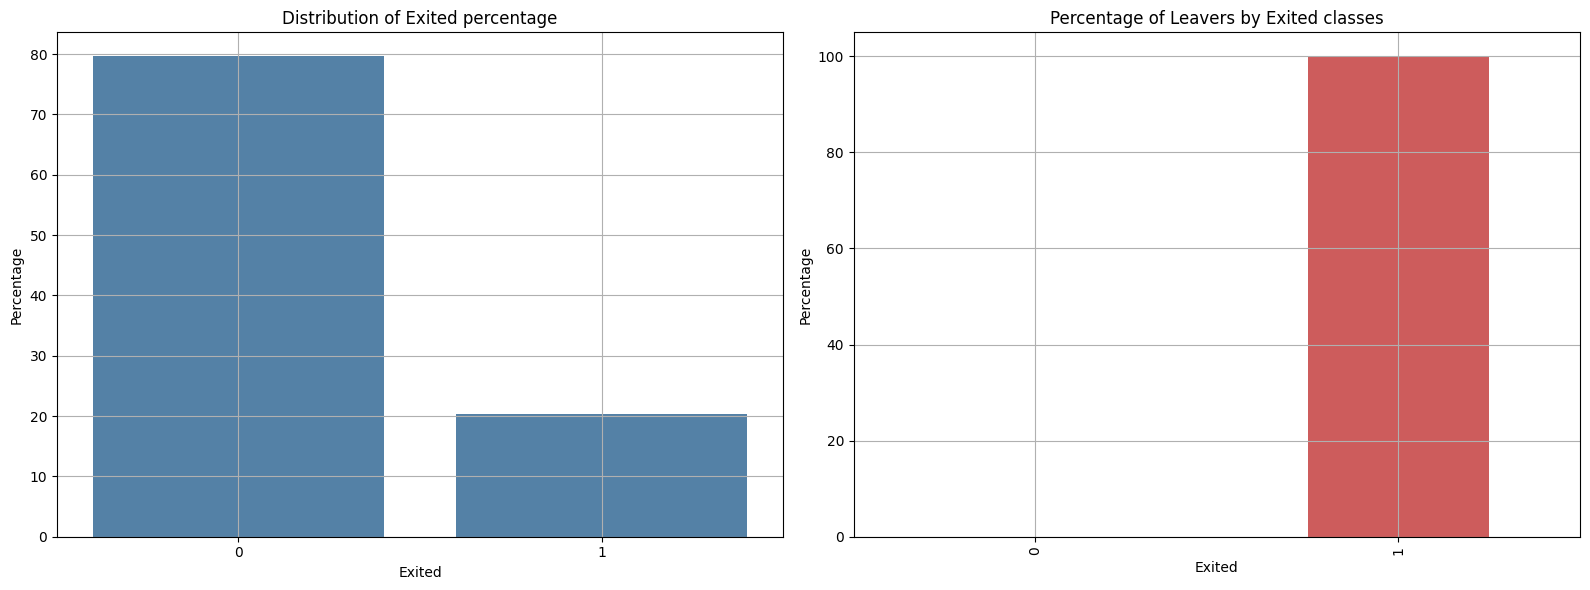


Percentage of unique categories for Complain:
Complain
0    79.56
1    20.44
Name: proportion, dtype: float64

Percentage of leavers by Complain:
Complain
0     0.050277
1    99.510763
Name: Exited, dtype: float64


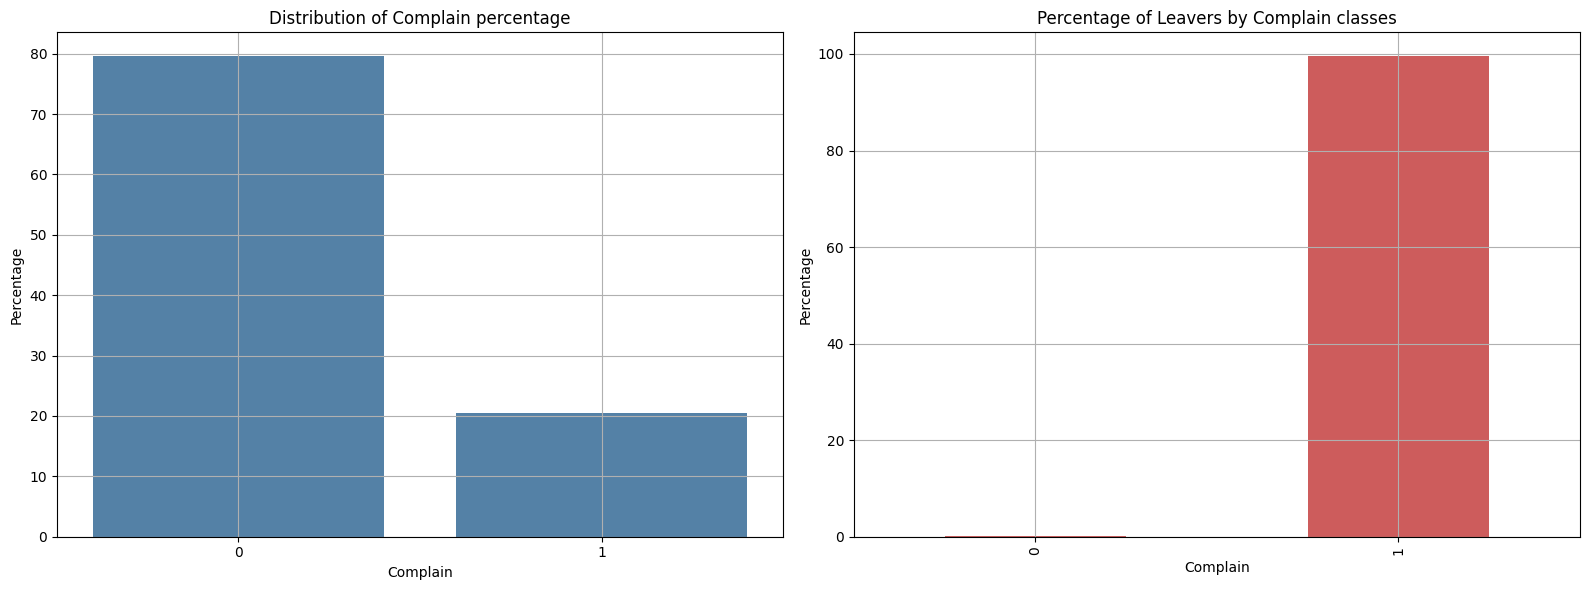


Percentage of unique categories for Satisfaction Score:
Satisfaction Score
3    20.42
2    20.14
4    20.08
5    20.04
1    19.32
Name: proportion, dtype: float64

Percentage of leavers by Satisfaction Score:
Satisfaction Score
3    19.637610
2    21.797418
4    20.617530
5    19.810379
1    20.031056
Name: Exited, dtype: float64


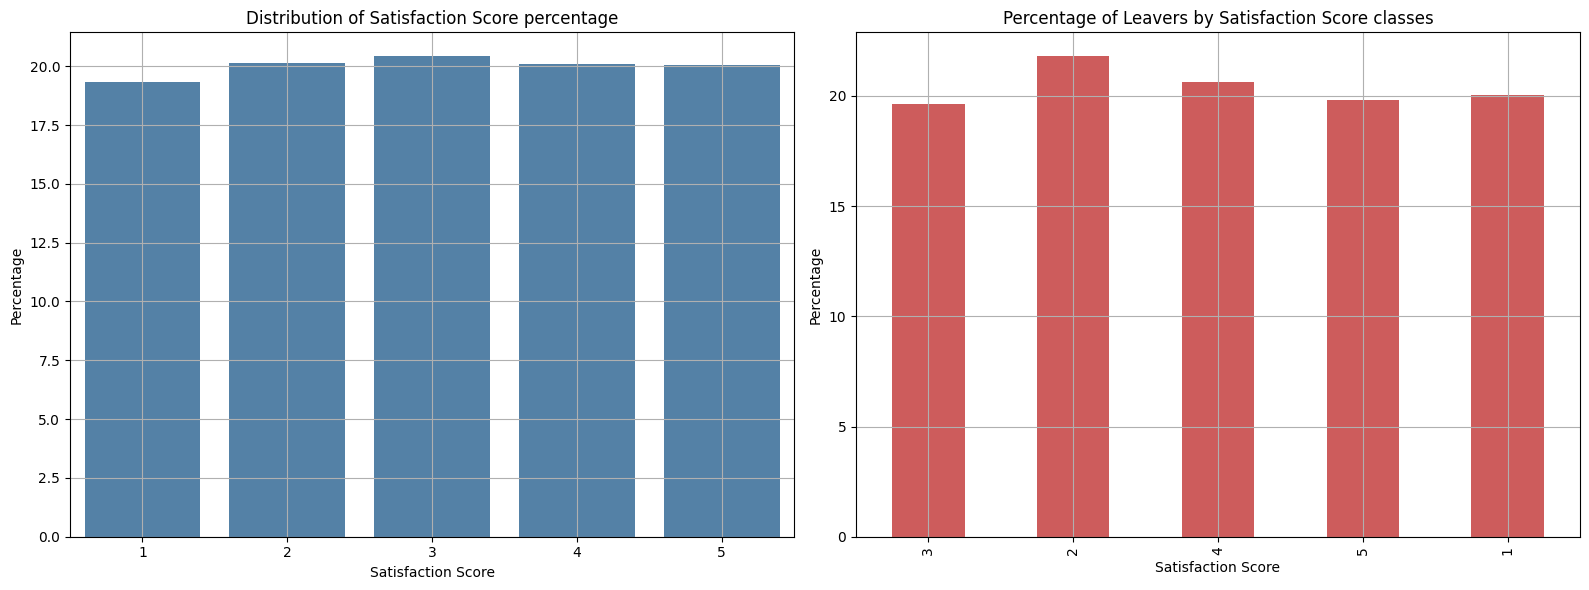


Percentage of unique categories for Card Type:
Card Type
DIAMOND     25.07
GOLD        25.02
SILVER      24.96
PLATINUM    24.95
Name: proportion, dtype: float64

Percentage of leavers by Card Type:
Card Type
DIAMOND     21.779019
GOLD        19.264588
SILVER      20.112179
PLATINUM    20.360721
Name: Exited, dtype: float64


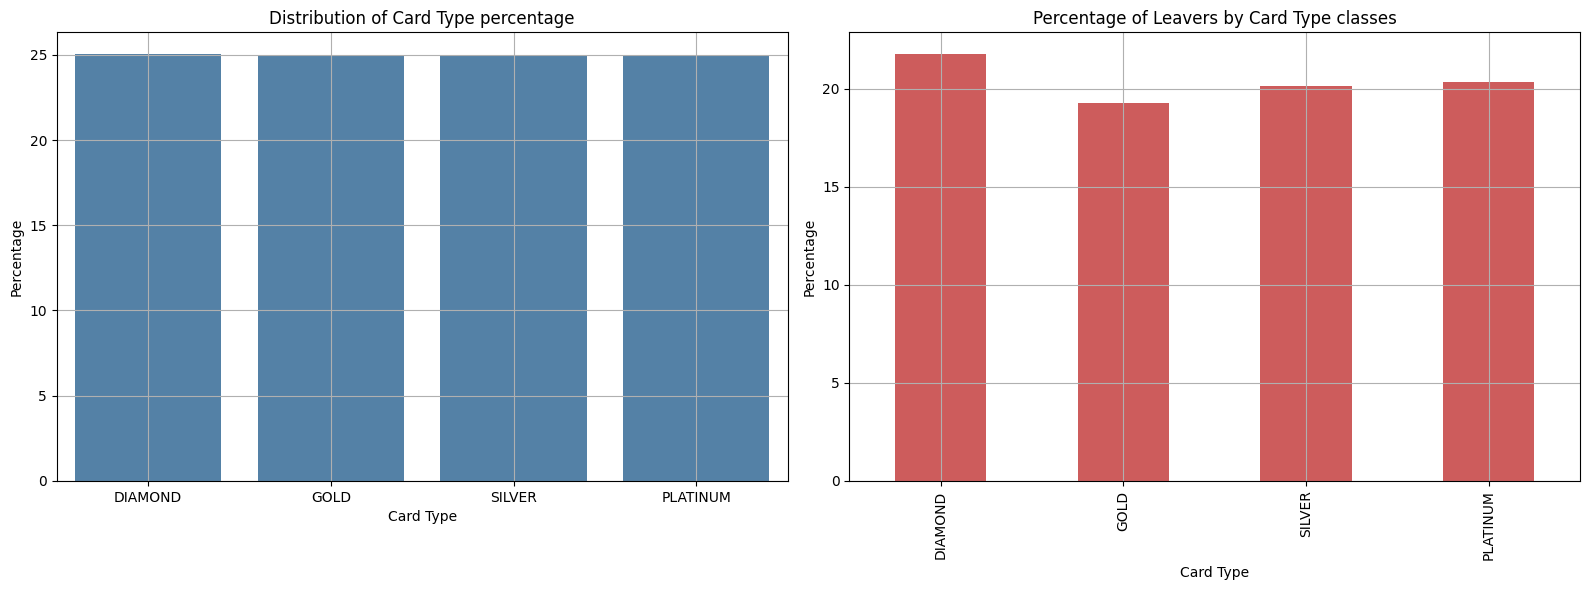

'We can see that some features are really impactful for churn rate as following:\n    1- Geography: the percentage of leavers in Germany is double of the percentage in Spain and France.\n    2- Gender: the leaving females are more than leaving males by significant percentage.\n    3- NumOfProducts: this feature is a little bit tricky as we can see all customer with four purchased products\n       and about 80% of customers with three purchased products leave the bank but actually those customers are \n       only about 3% of the total dataset and the rest is customers with only one purchased products and \n       two purchased products and we can also observe that the percentage of leavers with only one product is \n       three times of percentage leavers with two products which means that about 70% of leavers only \n       purchase one product.\n    4- IsActiveMember: percentage of leavers from non active members are double of the active members.\n    5- Complain: customers that comp

In [19]:
#plotting the unique values percentage and the percentage of leavers for each value
for feature in cat_features:
    value_counts = (data[feature].value_counts(normalize=True)) * 100  
    print(f"\nPercentage of unique categories for {feature}:")
    print(value_counts)
          
    leavers_pct = data.groupby(feature)['Exited'].mean() * 100
    leavers_pct = leavers_pct.reindex(value_counts.index, fill_value=0)
    print(f"\nPercentage of leavers by {feature}:")
    print(leavers_pct)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=False)
    
    ax_bar = axes[0]
    
    # Calculate percentages manually
    counts = data[feature].value_counts(normalize=True).mul(100).reindex(value_counts.index)
    sns.barplot(x=counts.index, y=counts.values, ax=ax_bar, color='steelblue') # use sns.countplot with stat argument = 'percent' if you use 0.13 version or later 
    ax_bar.set_title(f'Distribution of {feature} percentage')
    ax_bar.set_xlabel(feature)
    ax_bar.set_ylabel('Percentage')
    ax_bar.grid(True)
    
    leavers_pct.plot(kind='bar', ax=axes[1], color='indianred')
    axes[1].set_title(f'Percentage of Leavers by {feature} classes')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Percentage')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


"""We can see that some features are really impactful for churn rate as following:
    1- Geography: the percentage of leavers in Germany is double of the percentage in Spain and France.
    2- Gender: the leaving females are more than leaving males by significant percentage.
    3- NumOfProducts: this feature is a little bit tricky as we can see all customer with four purchased products
       and about 80% of customers with three purchased products leave the bank but actually those customers are 
       only about 3% of the total dataset and the rest is customers with only one purchased products and 
       two purchased products and we can also observe that the percentage of leavers with only one product is 
       three times of percentage leavers with two products which means that about 70% of leavers only 
       purchase one product.
    4- IsActiveMember: percentage of leavers from non active members are double of the active members.
    5- Complain: customers that complain leaves the bank by 99.5%.
    6- the other four columns have no significant impact on the churn rate."""

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

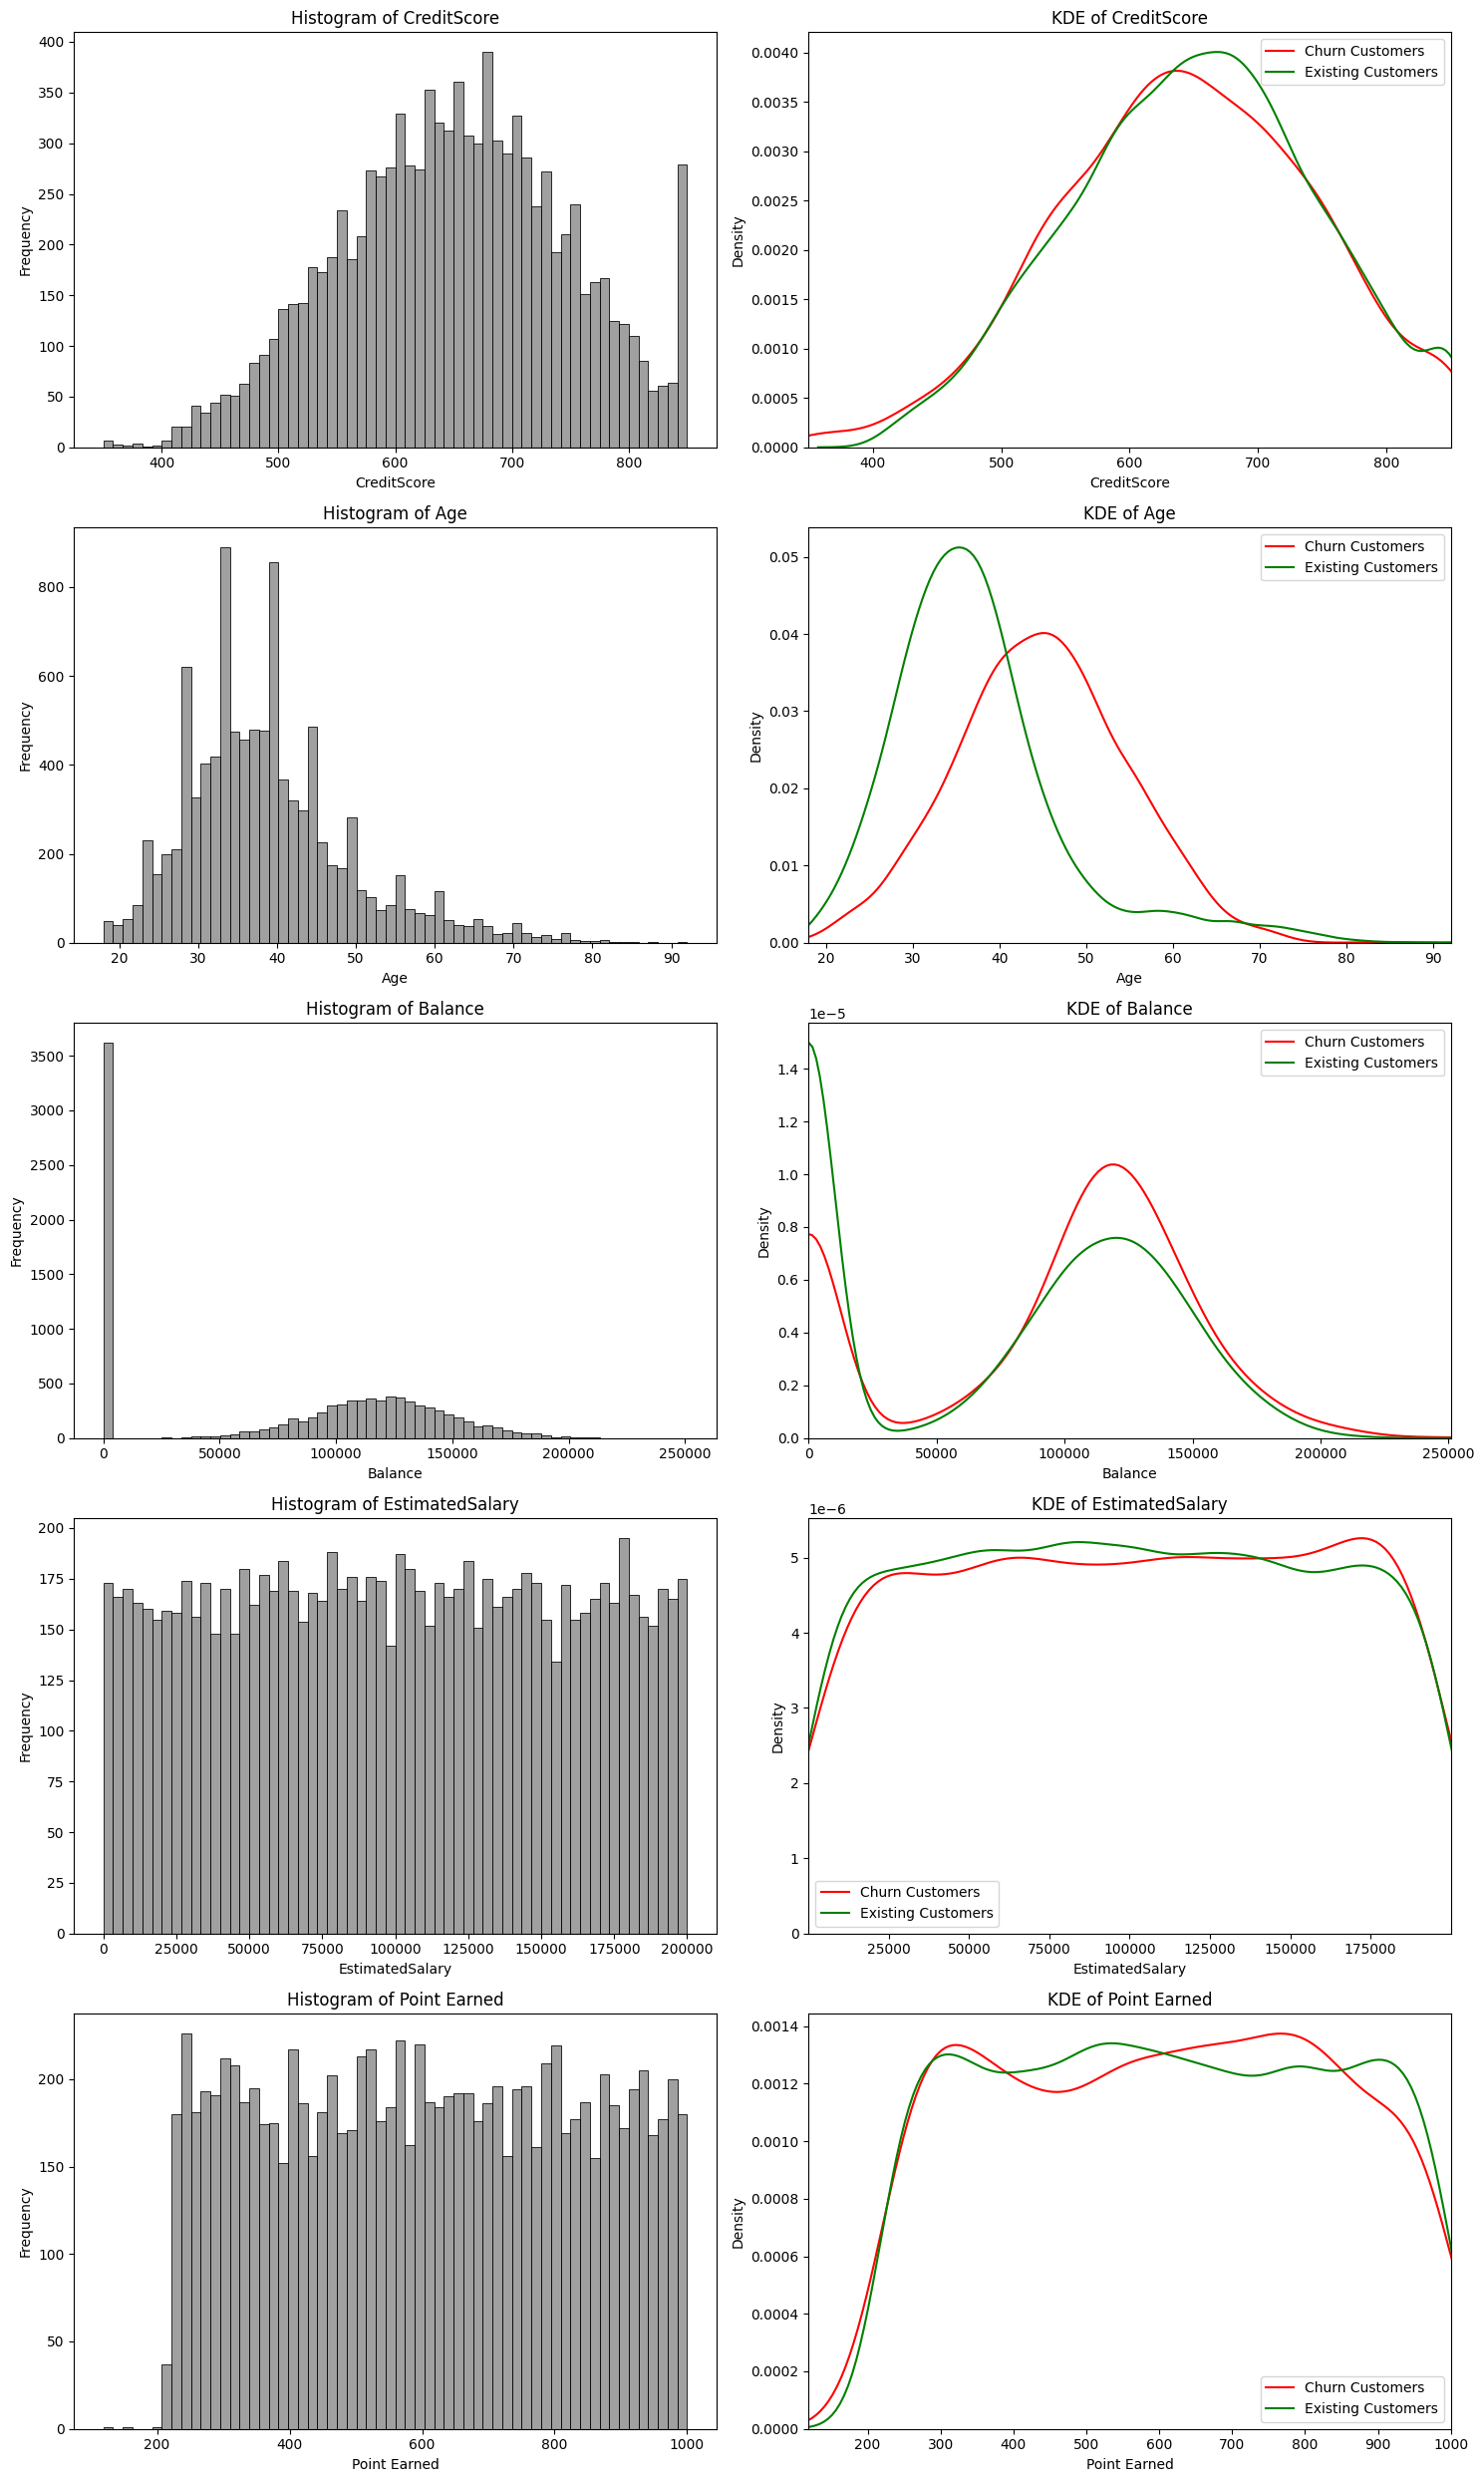

"Here is what I can observe from the figure \n     1- Both ['Point Earned', 'EstimatedSalary'] follow uniform distribution as mentioned above and their KDEs \n        are nearly identical for both churned and existing customers which indicates that those features do not \n        significantly differentiate between the two customer groups.\n     \n     2- For 'CreditScore', one can observe that the data follows a normal distribution as clarified in Q-Q plot\n        but there is a large portion of the customers at the most right of the distribution which will be \n        further analyzed numerically regarding the distribution of churn rate at this portion but at the first\n        look the KDEs for this feature indicates there is no differnce between them.\n     \n     3- For 'Age' feature, it is obvious that older customer are more likely to churn according to the KDEs\n        also the distribution of the 'Age' is positively skewed, A transformation will be applied to this feature.\

In [20]:
# we will now investigating the continous features through plotting the histogrgram and KDE for both existing and churn customers
fig, axes = plt.subplots(len(con_features), 2, figsize=(15, 5 * len(con_features)), sharex=False, sharey=False)

for i, feature in enumerate(con_features):
    ax_hist = axes[i, 0]
    ax_kde = axes[i, 1]
    
    sns.histplot(data[feature], kde=False, color='gray', ax=ax_hist, bins=60, label='Overall')
    ax_hist.set_title(f'Histogram of {feature}')
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel('Frequency')
    
    sns.kdeplot(data.loc[data['Exited'] == 1, feature], color='red', ax=ax_kde, label='Churn Customers')
    sns.kdeplot(data.loc[data['Exited'] == 0, feature], color='green', ax=ax_kde, label='Existing Customers')
    ax_kde.set_title(f'KDE of {feature}')
    ax_kde.set_xlabel(feature)
    ax_kde.set_ylabel('Density')
    ax_kde.legend()
    
    ax_kde.set_xlim(left=data[feature].min(), right=data[feature].max())

plt.tight_layout()
plt.show()



"""Here is what I can observe from the figure 
     1- Both ['Point Earned', 'EstimatedSalary'] follow uniform distribution as mentioned above and their KDEs 
        are nearly identical for both churned and existing customers which indicates that those features do not 
        significantly differentiate between the two customer groups.
     
     2- For 'CreditScore', one can observe that the data follows a normal distribution as clarified in Q-Q plot
        but there is a large portion of the customers at the most right of the distribution which will be 
        further analyzed numerically regarding the distribution of churn rate at this portion but at the first
        look the KDEs for this feature indicates there is no differnce between them.
     
     3- For 'Age' feature, it is obvious that older customer are more likely to churn according to the KDEs
        also the distribution of the 'Age' is positively skewed, A transformation will be applied to this feature.
     
     4- For the 'Balance' I will consider checking this large portion at the left regarding its relationship 
        with the target as this is the only part of the distribution that show a higher estimation for existing
        customers over churned customers."""

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


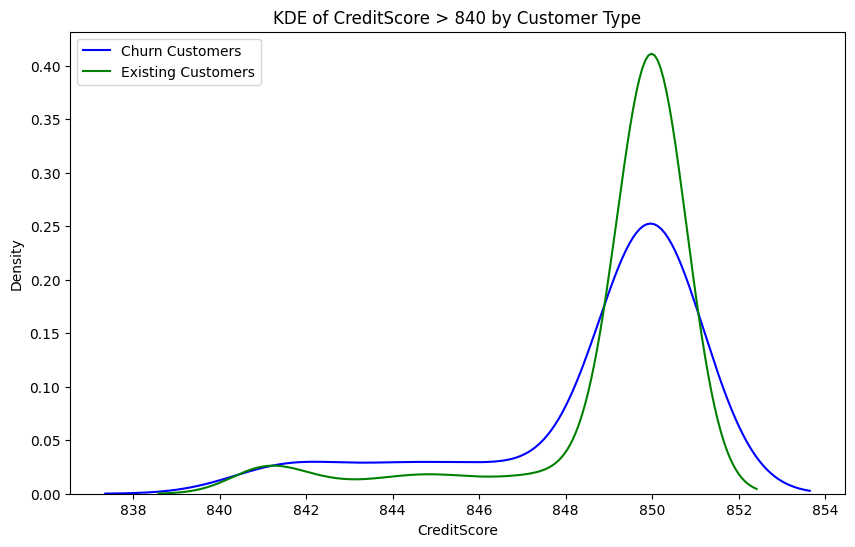

The skewness fot the CreditScore is -0.07160660820092675
Value Counts for customers with CreditScore > 840:
Exited
0    233
1     58
Name: count, dtype: int64
Percentage of churned customers in this group: 19.93%


'The results for the further analysis as following:\n    1- The KDE for existing customers is higher than for churned ones in this group which makes sense for the \n       portion with the highest CreditScore. \n    2- The skewness of the `CreditScore` feature is very close to zero confirming that it is almost symmetric.\n    3- The percentage of churned customers in this subset is 19.93% which is consistent with the overall \n       churn rate of 20.38% in the entire dataset.'

In [21]:
# further analysis for the CreditScore 
high_credit_score_data = data[data['CreditScore'] > 840]

plt.figure(figsize=(10, 6))
sns.kdeplot(high_credit_score_data.loc[high_credit_score_data['Exited'] == 1, 'CreditScore'], label='Churn Customers', color='blue')
sns.kdeplot(high_credit_score_data.loc[high_credit_score_data['Exited'] == 0, 'CreditScore'], label='Existing Customers', color='green')

plt.title('KDE of CreditScore > 840 by Customer Type')
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.legend()
plt.show()

print(f"The skewness fot the CreditScore is {data['CreditScore'].skew()}")

value_counts = high_credit_score_data['Exited'].value_counts()
print("Value Counts for customers with CreditScore > 840:")
print(value_counts)

churn_percentage = value_counts[1] / value_counts.sum() * 100
print(f'Percentage of churned customers in this group: {churn_percentage:.2f}%')


"""The results for the further analysis as following:
    1- The KDE for existing customers is higher than for churned ones in this group which makes sense for the 
       portion with the highest CreditScore. 
    2- The skewness of the `CreditScore` feature is very close to zero confirming that it is almost symmetric.
    3- The percentage of churned customers in this subset is 19.93% which is consistent with the overall 
       churn rate of 20.38% in the entire dataset."""

In [22]:
# next we will apply several transformations for Age feature and further analyze it
data['Age_LogTransformed'] = np.log(data.Age)
data['Age_BoxCoxTransformed'], parameter = ss.boxcox(data.Age)

age_features = ['Age', 'Age_LogTransformed', 'Age_BoxCoxTransformed']

for feature in age_features:
    if feature == 'Age_BoxCoxTransformed':
        print(f'The skewness of the {feature} feature is {data[feature].skew()} and parameter is {parameter}')
    else:
        print(f'The skewness of the {feature} feature is {data[feature].skew()}')


        
"""Now we have transformed our data using BoxCOX and natural logarithm tranformations, we can see that BoxCox 
   is the best choice to transform the data to almost has a standard normality
   
   Note that when the parameter of BoxCox is equal to 0, it is actually a natural logarithm that we 
   also applied so the first transformation is a special case of the second transformation"""

The skewness of the Age feature is 1.0113202630234552
The skewness of the Age_LogTransformed feature is 0.182020112559587
The skewness of the Age_BoxCoxTransformed feature is -0.002396682532113449 and parameter is -0.2241984111693876


'Now we have transformed our data using BoxCOX and natural logarithm tranformations, we can see that BoxCox \n   is the best choice to transform the data to almost has a standard normality\n   \n   Note that when the parameter of BoxCox is equal to 0, it is actually a natural logarithm that we \n   also applied so the first transformation is a special case of the second transformation'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

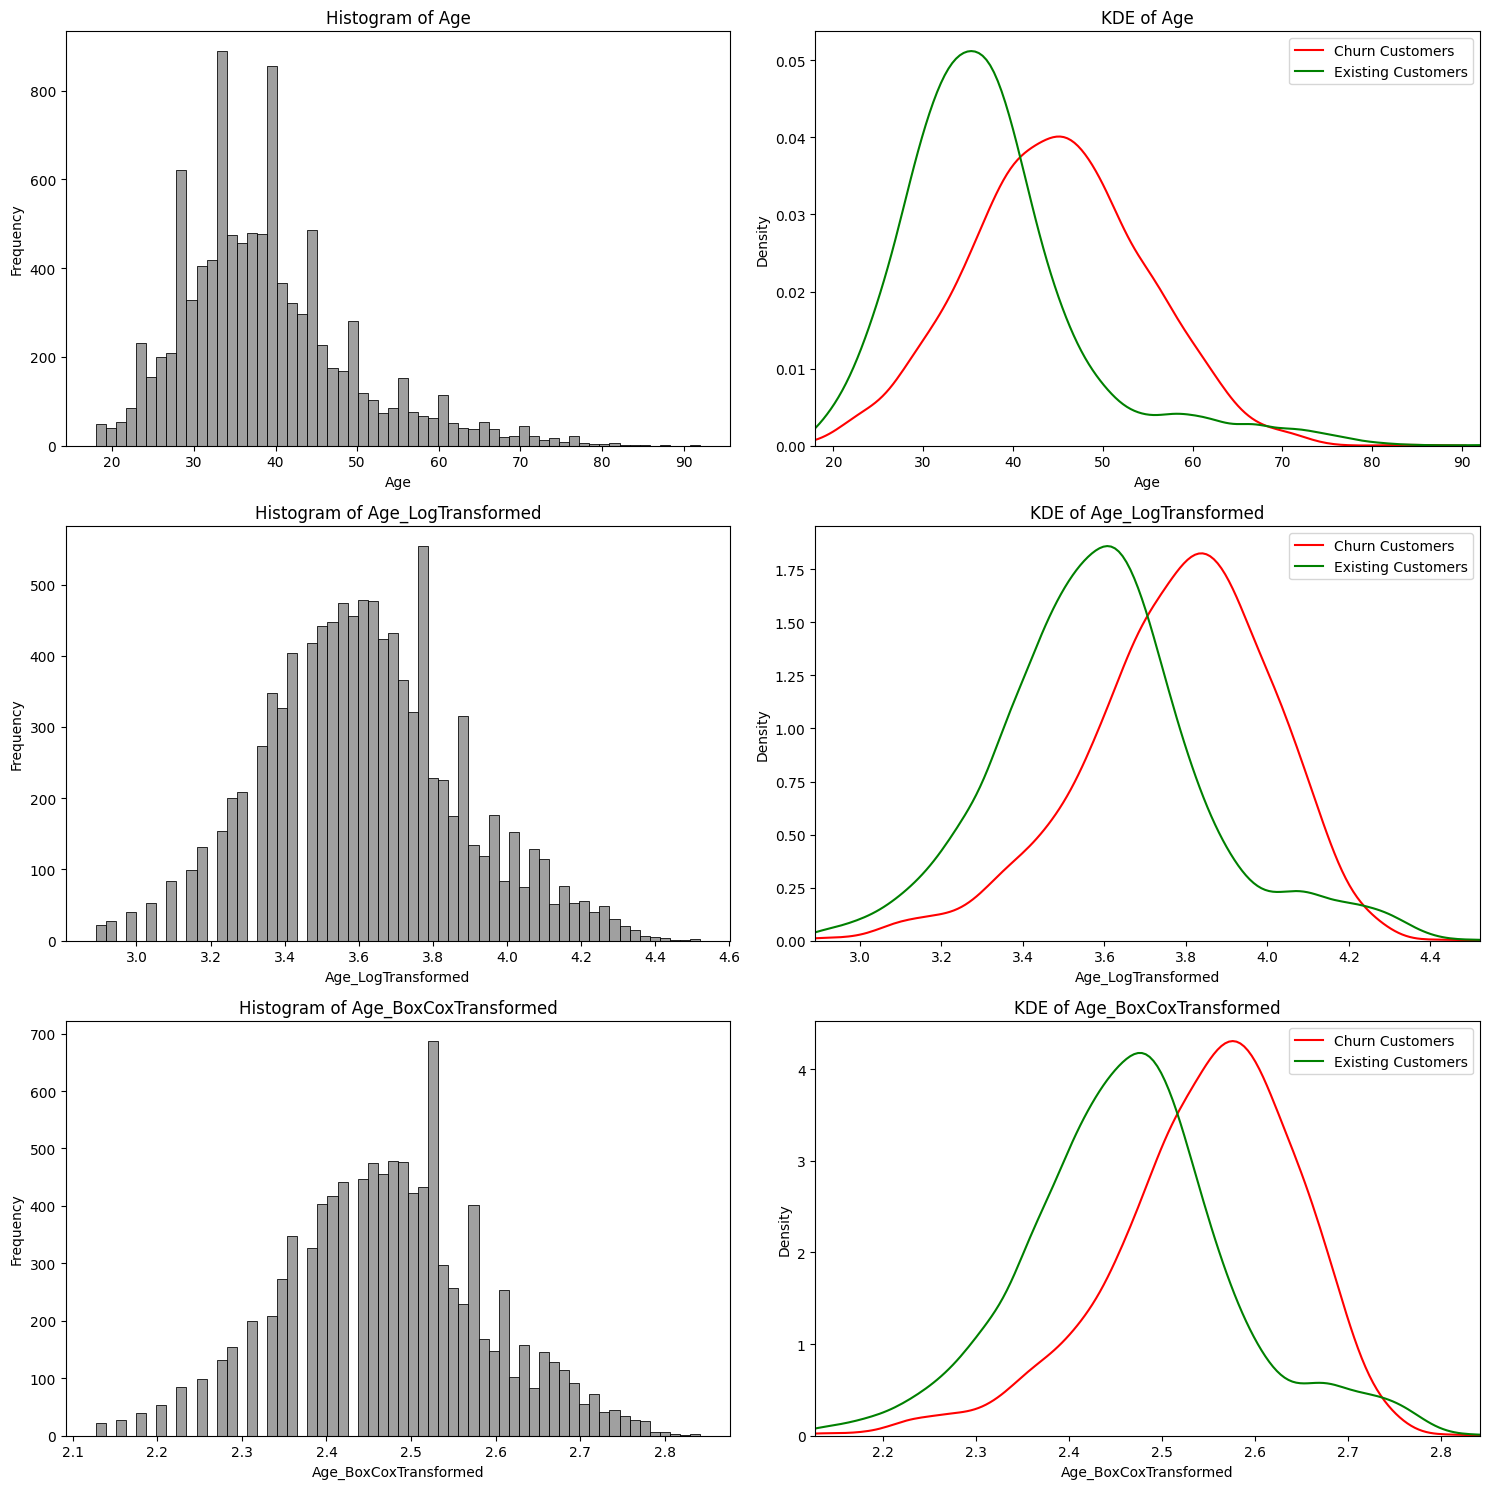

'Plotting the histogram shows that the transformed data are more closer to the standard normal distribution\n   where the KDEs still indicate the same as the original data which is that the older the customers the more \n   lokely they churn.'

In [23]:
# plotting the histogram for the tranformed data and the KDEs for both classes (esisting, churn)  
age_features = ['Age', 'Age_LogTransformed', 'Age_BoxCoxTransformed']

fig, axes = plt.subplots(len(age_features), 2, figsize=(15, 5 * len(age_features)), sharex=False, sharey=False)

for i, feature in enumerate(age_features):
    ax_hist = axes[i, 0]
    ax_kde = axes[i, 1]
    
    sns.histplot(data[feature], kde=False, color='gray', ax=ax_hist, bins=60, label='Overall')
    ax_hist.set_title(f'Histogram of {feature}')
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel('Frequency')
    
    sns.kdeplot(data.loc[data['Exited'] == 1, feature], color='red', ax=ax_kde, label='Churn Customers')
    sns.kdeplot(data.loc[data['Exited'] == 0, feature], color='green', ax=ax_kde, label='Existing Customers')
    ax_kde.set_title(f'KDE of {feature}')
    ax_kde.set_xlabel(feature)
    ax_kde.set_ylabel('Density')
    ax_kde.legend()
    
    ax_kde.set_xlim(left=data[feature].min(), right=data[feature].max())

plt.tight_layout()
plt.show()


"""Plotting the histogram shows that the transformed data are more closer to the standard normal distribution
   where the KDEs still indicate the same as the original data which is that the older the customers the more 
   lokely they churn."""

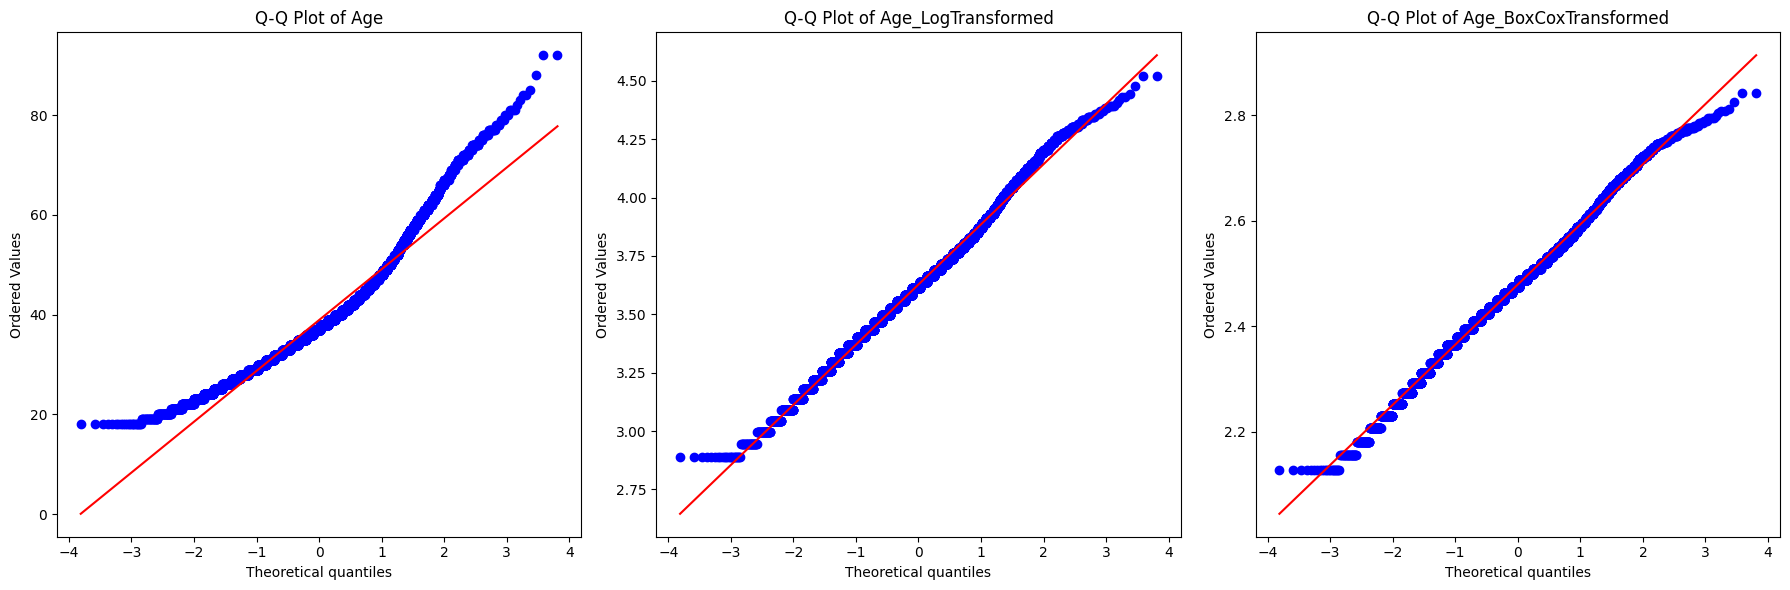

In [24]:
# plotting the q-q plot for the new transformed data for Age feature
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

ss.probplot(data['Age'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of Age')

ss.probplot(data['Age_LogTransformed'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Age_LogTransformed')

ss.probplot(data['Age_BoxCoxTransformed'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot of Age_BoxCoxTransformed')

plt.tight_layout()
plt.show()

In [25]:
# now we will consider the Balance feature and analyze it regarding the large portion of the data around zero
# dividing the feature in ranges to get the customers in each range by thresholds
thresholds = [0, 50000, 100000, 150000, 200000, 250000]
total_customers = data.shape[0]

zero_balance_count = data[data['Balance'] == 0].shape[0]
zero_balance_percentage = (zero_balance_count / total_customers) * 100
print(f'Number of customers with a balance of 0: {zero_balance_count} ({zero_balance_percentage:.2f}%)')

highest_balance_count = data[data['Balance'] > 250000].shape[0]
highest_balance_percentage = (highest_balance_count / total_customers) * 100
print(f'Number of customers with a balance over 250000: {highest_balance_count} ({highest_balance_percentage:.2f}%)')

for i in range(len(thresholds) - 1):
    lower_threshold = thresholds[i]
    upper_threshold = thresholds[i + 1]
    
    count = data[(data['Balance'] > lower_threshold) & (data['Balance'] <= upper_threshold)].shape[0]
    percentage = (count / total_customers) * 100
    print(f'Number of customers within the range {lower_threshold} and {upper_threshold}: {count} ({percentage:.2f}%)')



"""no we see that we have over 3600 cutomers with balance equal to 0 balance, we need to investigate 
   this large percentage and analyze its relationship with other features"""

Number of customers with a balance of 0: 3617 (36.17%)
Number of customers with a balance over 250000: 1 (0.01%)
Number of customers within the range 0 and 50000: 75 (0.75%)
Number of customers within the range 50000 and 100000: 1509 (15.09%)
Number of customers within the range 100000 and 150000: 3830 (38.30%)
Number of customers within the range 150000 and 200000: 935 (9.35%)
Number of customers within the range 200000 and 250000: 33 (0.33%)


'no we see that we have over 3600 cutomers with balance equal to 0 balance, we need to investigate \n   this large percentage and analyze its relationship with other features'

In [26]:
# this is a sanity check to make sure the 75 between 0 and 50k do not have something not normal
low_balance = data[(data['Balance'] > 0) & (data['Balance'] <= 50000)]

low_churn_count = low_balance[low_balance['Exited'] == 1].shape[0]
low_total_count = low_balance.shape[0]
low_bal_churn_perc = low_churn_count / low_total_count

print(f'Total number of customers with low balance: {low_total_count}')
print(f'Number of churned customers with low balance: {low_churn_count}')
print(f'Number of non-churned customers with low balance: {low_total_count - low_churn_count}')

print(f'Percentage of churned customers with low balance {low_bal_churn_perc * 100:.2f}%')


"""the results for this portion is quite interesting, despite the number of customers in this portion is less
   1% but their churn rate is significantly high (34.67%) compared to the overall churn rate (20.38%)
   now we will do the same for the other 2 classes (customers with 0 balance and customers with > 50k)"""

Total number of customers with low balance: 75
Number of churned customers with low balance: 26
Number of non-churned customers with low balance: 49
Percentage of churned customers with low balance 34.67%


'the results for this portion is quite interesting, despite the number of customers in this portion is less\n   1% but their churn rate is significantly high (34.67%) compared to the overall churn rate (20.38%)\n   now we will do the same for the other 2 classes (customers with 0 balance and customers with > 50k)'

In [27]:
zerp_balance = data[data['Balance'] == 0]

zero_churn_count = zerp_balance[zerp_balance['Exited'] == 1].shape[0]
zero_total_count = zerp_balance.shape[0]
zero_bal_churn_perc = zero_churn_count / zero_total_count

print(f'Total number of customers with zero balance: {zero_total_count}')
print(f'Number of churned customers with zero balance: {zero_churn_count}')
print(f'Number of non-churned customers with zero balance: {zero_total_count - zero_churn_count}')

print(f'Percentage of churned customers with zero balance {zero_bal_churn_perc * 100:.2f}%')


"""Despite the customers with 0 balance are the largest portion of the total data but the churn rate for this 
   portion is somehow small (13.82%) compared to the overall churn rate 20.38%"""

Total number of customers with zero balance: 3617
Number of churned customers with zero balance: 500
Number of non-churned customers with zero balance: 3117
Percentage of churned customers with zero balance 13.82%


'Despite the customers with 0 balance are the largest portion of the total data but the churn rate for this \n   portion is somehow small (13.82%) compared to the overall churn rate 20.38%'

In [28]:
high_balance = data[data['Balance'] > 50000]

high_churn_count = high_balance[high_balance['Exited'] == 1].shape[0]
high_total_count = high_balance.shape[0]
high_bal_churn_perc = high_churn_count / high_total_count

print(f'Total number of customers with high balance: {high_total_count}')
print(f'Number of churned customers with high balance: {high_churn_count}')
print(f'Number of non-churned customers with high balance: {high_total_count - high_churn_count}')

print(f'Percentage of churned customers with high balance {high_bal_churn_perc * 100:.2f}%')

Total number of customers with high balance: 6308
Number of churned customers with high balance: 1512
Number of non-churned customers with high balance: 4796
Percentage of churned customers with high balance 23.97%


The skewness for the Balnce feature above 50K is 0.19555107972433386


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


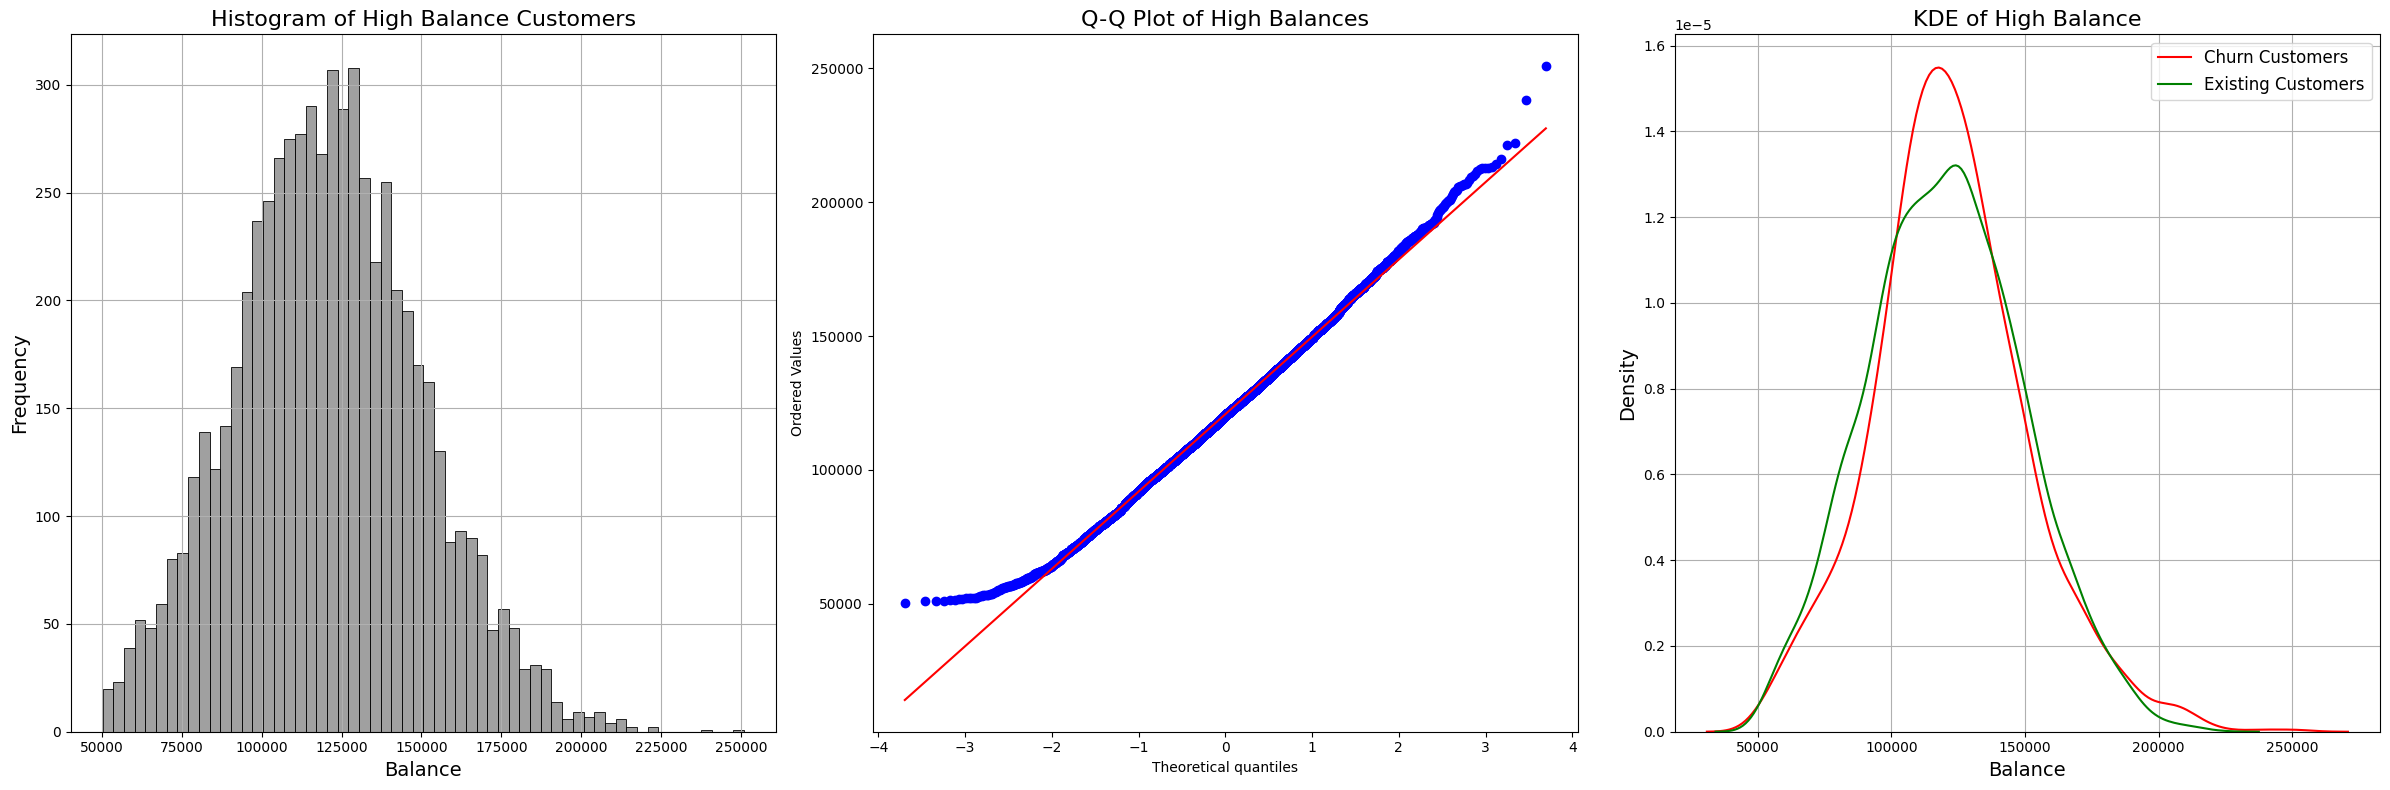

'Here we can observe that he Balane data above 50K is almost normal, we can also observe that the estimation \n   for churn customers between 100K and nearly 140K is higher than estimation for existing customers which are\n   the large portion of the customers about 38% of total dataset, this insight was obvious in the KDEs for the \n   whole Balance data rather than this we can see the estimation for both churned and existing customers \n   nearly the same (in the KDEs for the whole Balance data the estimation for churn rate dominated the estimation\n   for existing customers except for customers with zero balance)'

In [29]:
#now let's plot the hist and KDEs for the portion of the customers that have balance over 50K and its skewness
print(f"The skewness for the Balnce feature above 50K is {high_balance['Balance'].skew()}")

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

sns.histplot(high_balance['Balance'], kde=False, color='gray', ax=axs[0], bins=60, label='Overall')
axs[0].set_title('Histogram of High Balance Customers', fontsize=16)
axs[0].set_xlabel('Balance', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(True)

ss.probplot(high_balance['Balance'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of High Balances', fontsize=16)

sns.kdeplot(high_balance.loc[high_balance['Exited'] == 1, 'Balance'], color='red', label='Churn Customers', ax=axs[2])
sns.kdeplot(high_balance.loc[high_balance['Exited'] == 0, 'Balance'], color='green', label='Existing Customers', ax=axs[2])
axs[2].set_title('KDE of High Balance', fontsize=16)
axs[2].set_xlabel('Balance', fontsize=14)
axs[2].set_ylabel('Density', fontsize=14)
axs[2].legend(fontsize=12)
axs[2].grid(True)

plt.tight_layout()
plt.show()


"""Here we can observe that he Balane data above 50K is almost normal, we can also observe that the estimation 
   for churn customers between 100K and nearly 140K is higher than estimation for existing customers which are
   the large portion of the customers about 38% of total dataset, this insight was obvious in the KDEs for the 
   whole Balance data rather than this we can see the estimation for both churned and existing customers 
   nearly the same (in the KDEs for the whole Balance data the estimation for churn rate dominated the estimation
   for existing customers except for customers with zero balance)"""

In [30]:
def categorize_balance(balance):
    if balance <= 0:
        return 'Zero'
    elif balance <= 50000:
        return '0-50K'
    else:
        return '50K+'

data['Balance_Category'] = data['Balance'].apply(categorize_balance)

zero_count = (data['Balance_Category'] == 'Zero').sum()
print(zero_count)


3617


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

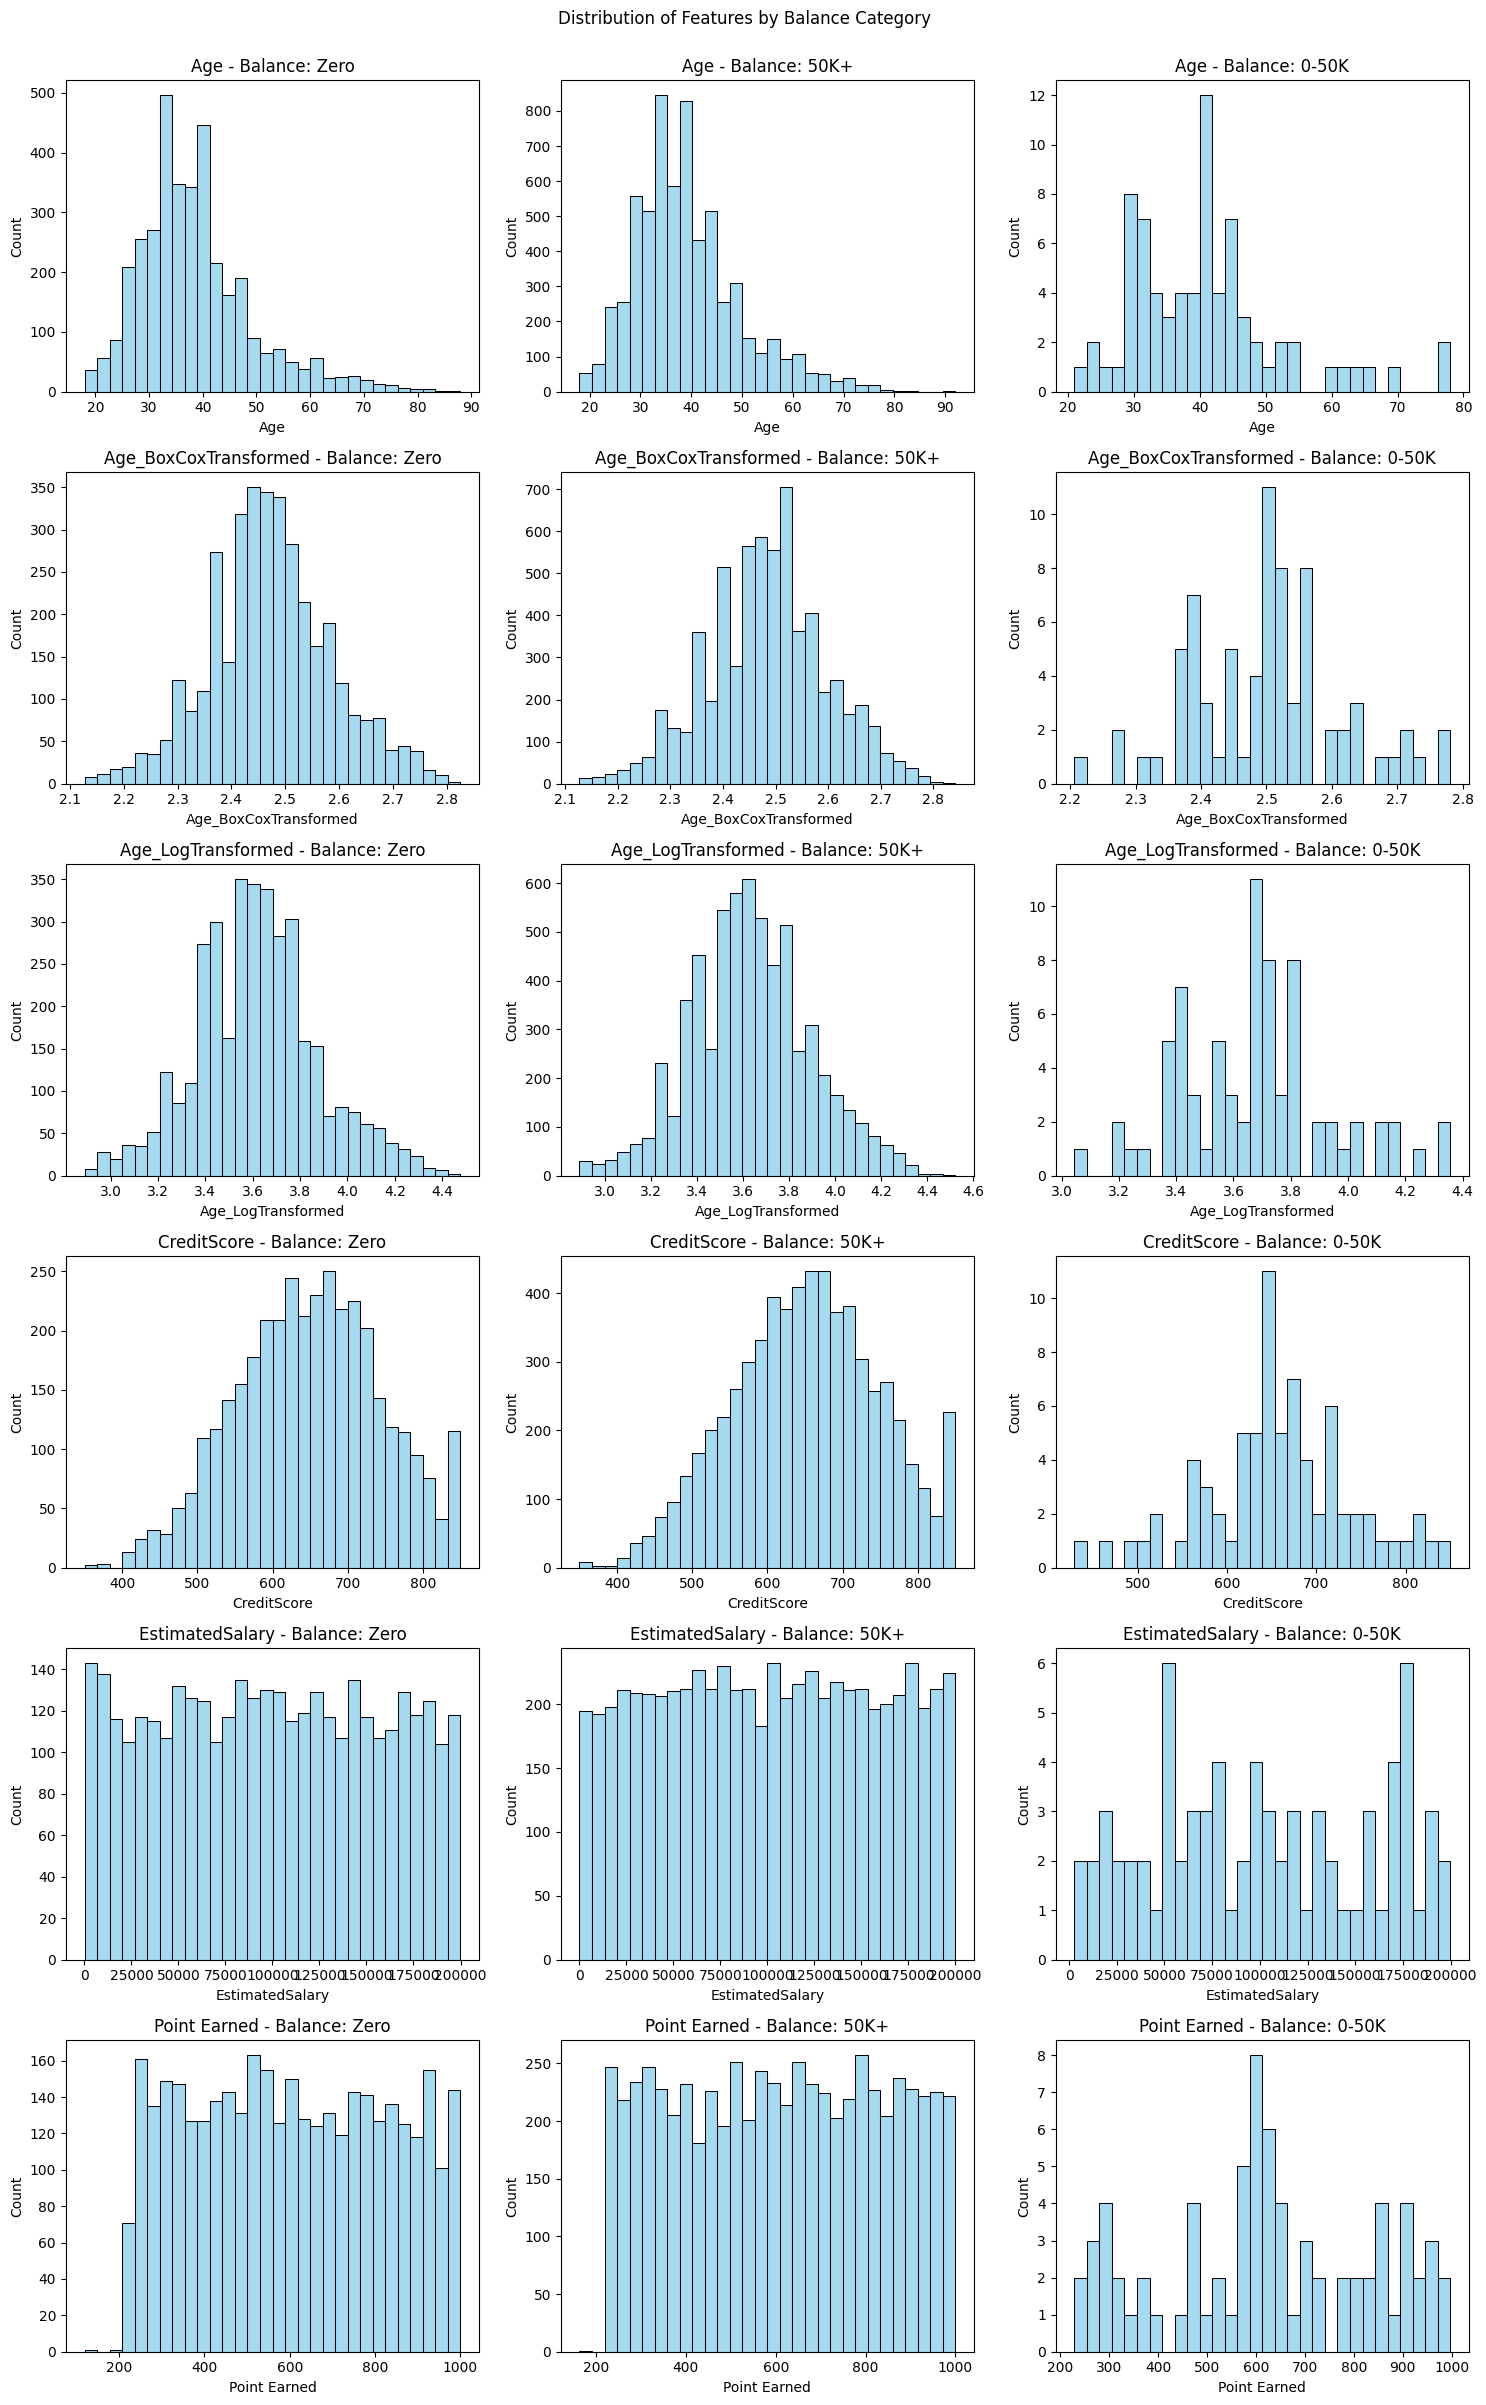

In [31]:
Balance_cot_features = ['Age', 'Age_BoxCoxTransformed', 'Age_LogTransformed', 'CreditScore', \
                        'EstimatedSalary', 'Point Earned']  
balance_categories = data['Balance_Category'].unique()

n_features = len(Balance_cot_features)
n_categories = len(balance_categories)
fig, axes = plt.subplots(n_features, n_categories, figsize=(5 * n_categories, 4 * n_features))

for i, feature in enumerate(Balance_cot_features):
    for j, category in enumerate(balance_categories):
        ax = axes[i, j] if n_features > 1 else axes[j]
        sns.histplot(data=data[data['Balance_Category'] == category], x=feature, bins=30, ax=ax, color='skyblue')
        ax.set_title(f'{feature} - Balance: {category}')
        if i == n_features - 1:
            ax.set_xlabel(feature)
        if j == 0:
            ax.set_ylabel('Count')

plt.suptitle('Distribution of Features by Balance Category', y=1)
plt.tight_layout()
plt.show()


Percentage distribution for feature: Geography

Geography: France | Balance_Category: 0-50K | Percentage: 54.67%
Geography: Germany | Balance_Category: 0-50K | Percentage: 25.33%
Geography: Spain | Balance_Category: 0-50K | Percentage: 20.00%
Geography: France | Balance_Category: 50K+ | Percentage: 40.50%
Geography: Germany | Balance_Category: 50K+ | Percentage: 39.47%
Geography: Spain | Balance_Category: 50K+ | Percentage: 20.02%
Geography: France | Balance_Category: Zero | Percentage: 66.85%
Geography: Spain | Balance_Category: Zero | Percentage: 33.15%


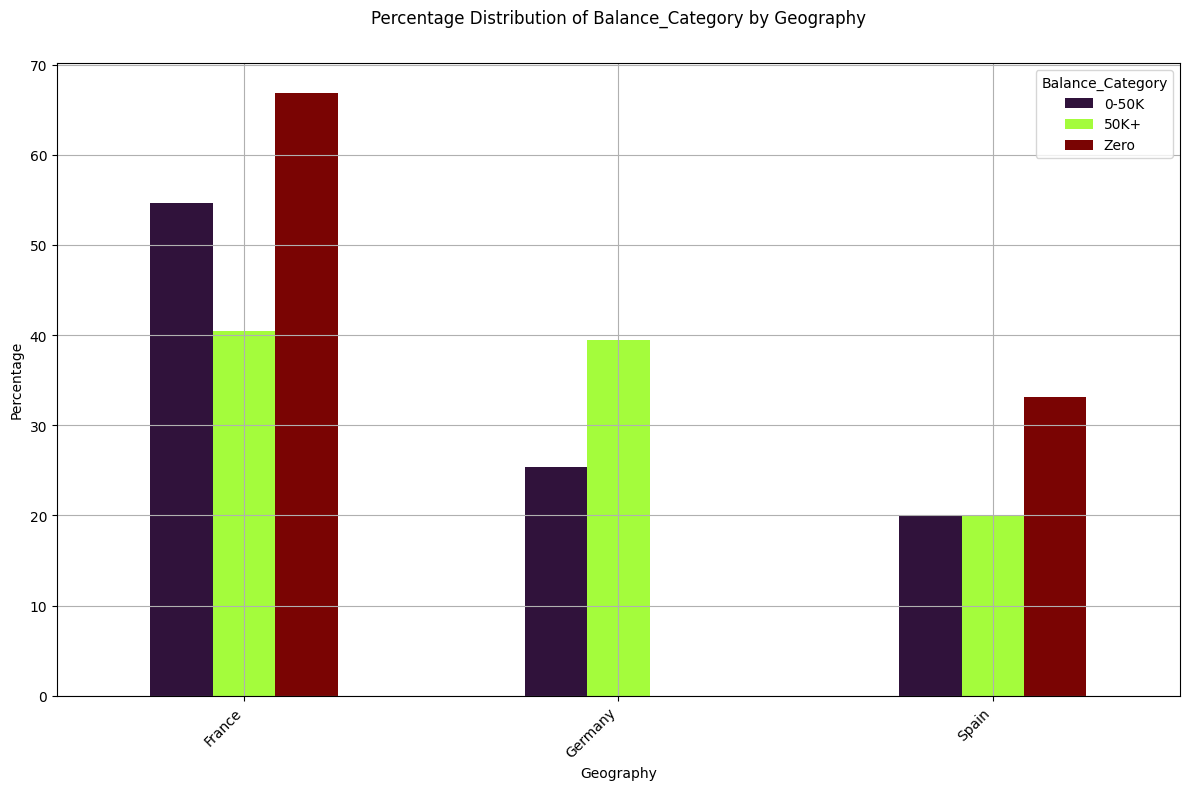


Percentage distribution for feature: Gender

Gender: Female | Balance_Category: 0-50K | Percentage: 57.33%
Gender: Male | Balance_Category: 0-50K | Percentage: 42.67%
Gender: Female | Balance_Category: 50K+ | Percentage: 45.12%
Gender: Male | Balance_Category: 50K+ | Percentage: 54.88%
Gender: Female | Balance_Category: Zero | Percentage: 45.73%
Gender: Male | Balance_Category: Zero | Percentage: 54.27%


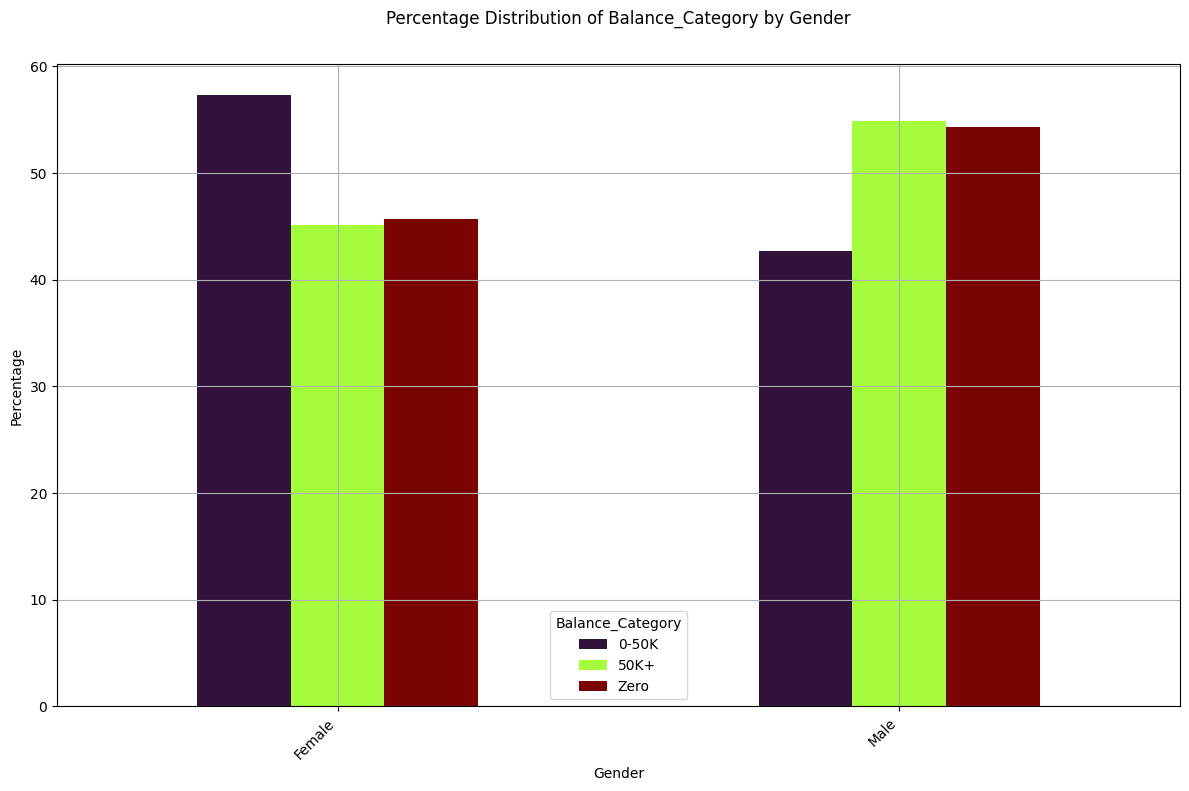


Percentage distribution for feature: NumOfProducts

NumOfProducts: 1 | Balance_Category: 0-50K | Percentage: 65.33%
NumOfProducts: 2 | Balance_Category: 0-50K | Percentage: 26.67%
NumOfProducts: 3 | Balance_Category: 0-50K | Percentage: 6.67%
NumOfProducts: 4 | Balance_Category: 0-50K | Percentage: 1.33%
NumOfProducts: 1 | Balance_Category: 50K+ | Percentage: 65.47%
NumOfProducts: 2 | Balance_Category: 50K+ | Percentage: 31.23%
NumOfProducts: 3 | Balance_Category: 50K+ | Percentage: 2.58%
NumOfProducts: 4 | Balance_Category: 50K+ | Percentage: 0.71%
NumOfProducts: 1 | Balance_Category: Zero | Percentage: 25.02%
NumOfProducts: 2 | Balance_Category: Zero | Percentage: 71.88%
NumOfProducts: 3 | Balance_Category: Zero | Percentage: 2.71%
NumOfProducts: 4 | Balance_Category: Zero | Percentage: 0.39%


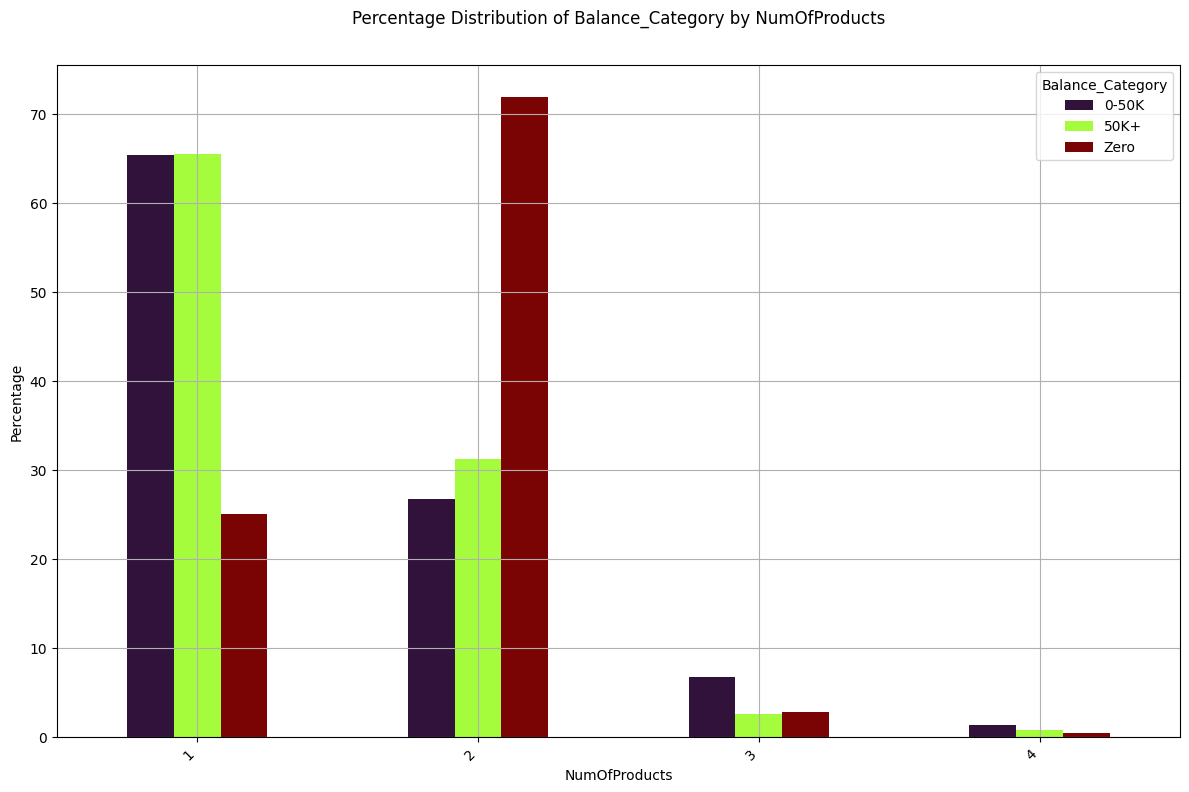


Percentage distribution for feature: IsActiveMember

IsActiveMember: 0 | Balance_Category: 0-50K | Percentage: 46.67%
IsActiveMember: 1 | Balance_Category: 0-50K | Percentage: 53.33%
IsActiveMember: 0 | Balance_Category: 50K+ | Percentage: 48.67%
IsActiveMember: 1 | Balance_Category: 50K+ | Percentage: 51.33%
IsActiveMember: 0 | Balance_Category: Zero | Percentage: 48.22%
IsActiveMember: 1 | Balance_Category: Zero | Percentage: 51.78%


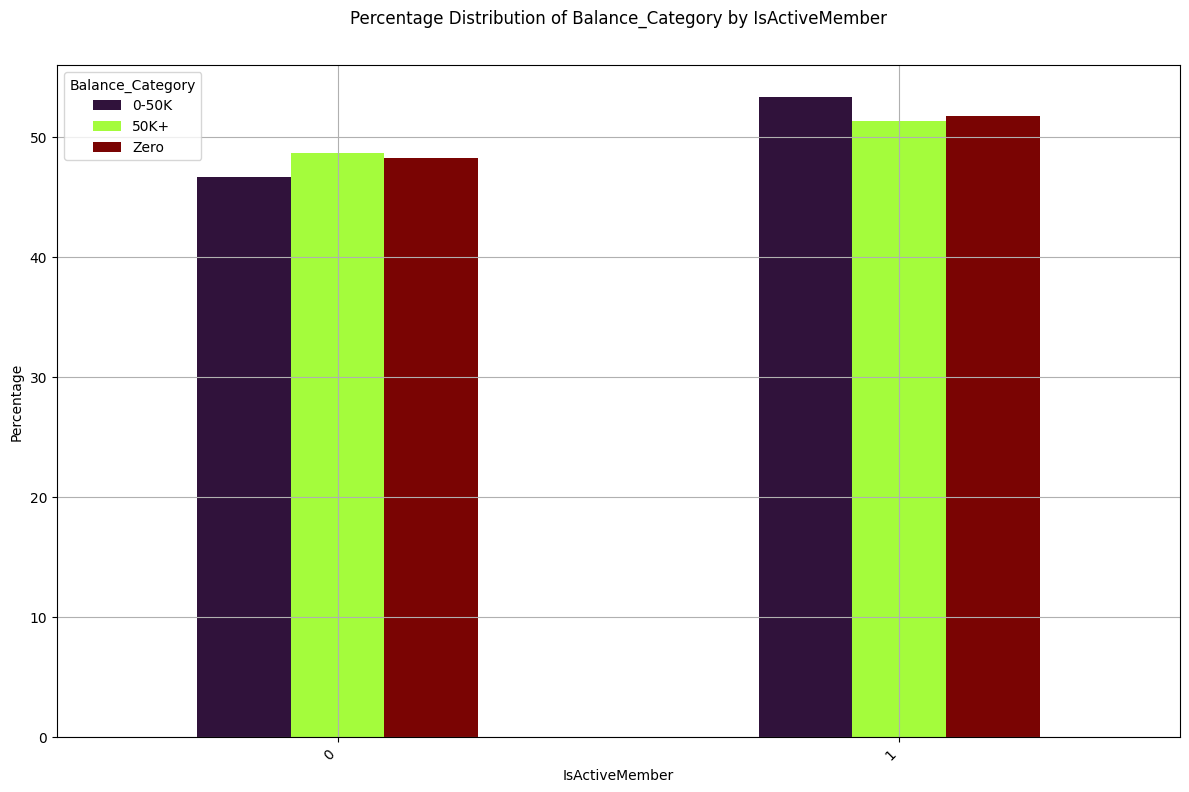


Percentage distribution for feature: Complain

Complain: 0 | Balance_Category: 0-50K | Percentage: 66.67%
Complain: 1 | Balance_Category: 0-50K | Percentage: 33.33%
Complain: 0 | Balance_Category: 50K+ | Percentage: 75.94%
Complain: 1 | Balance_Category: 50K+ | Percentage: 24.06%
Complain: 0 | Balance_Category: Zero | Percentage: 86.15%
Complain: 1 | Balance_Category: Zero | Percentage: 13.85%


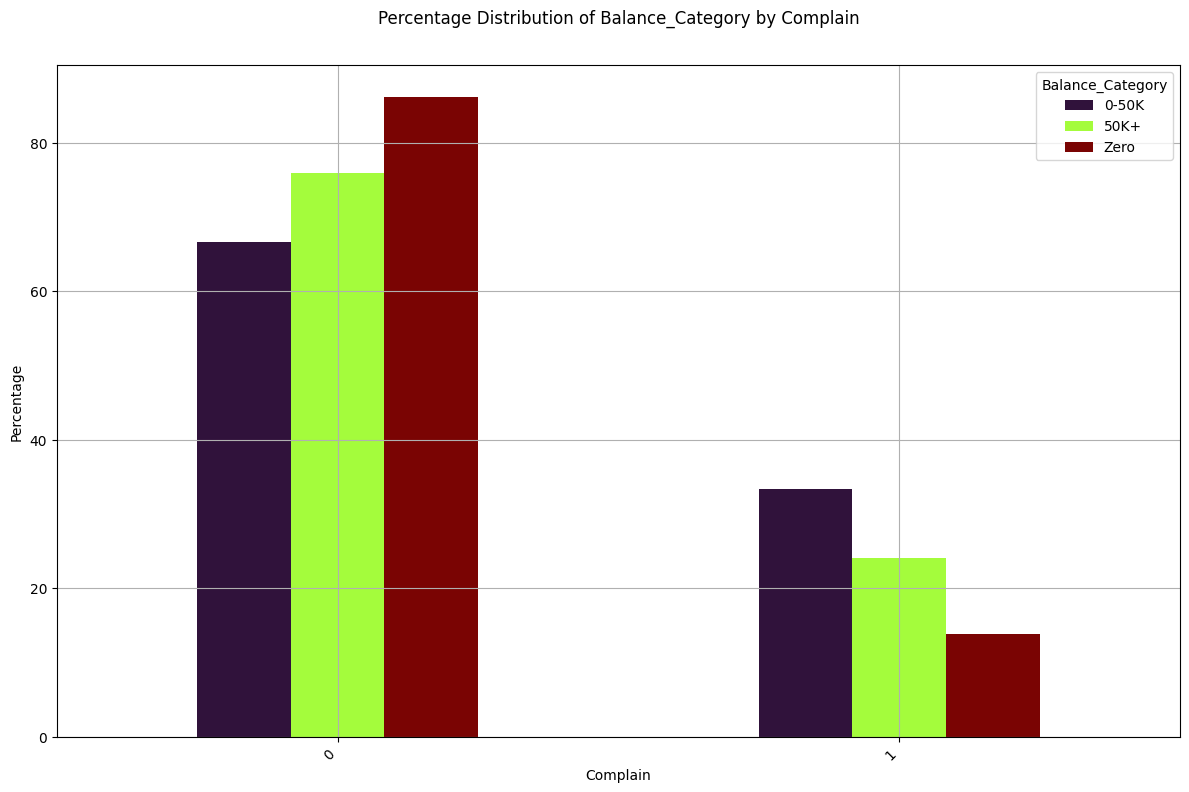


Percentage distribution for feature: HasCrCard

HasCrCard: 0 | Balance_Category: 0-50K | Percentage: 21.33%
HasCrCard: 1 | Balance_Category: 0-50K | Percentage: 78.67%
HasCrCard: 0 | Balance_Category: 50K+ | Percentage: 30.18%
HasCrCard: 1 | Balance_Category: 50K+ | Percentage: 69.82%
HasCrCard: 0 | Balance_Category: Zero | Percentage: 28.34%
HasCrCard: 1 | Balance_Category: Zero | Percentage: 71.66%


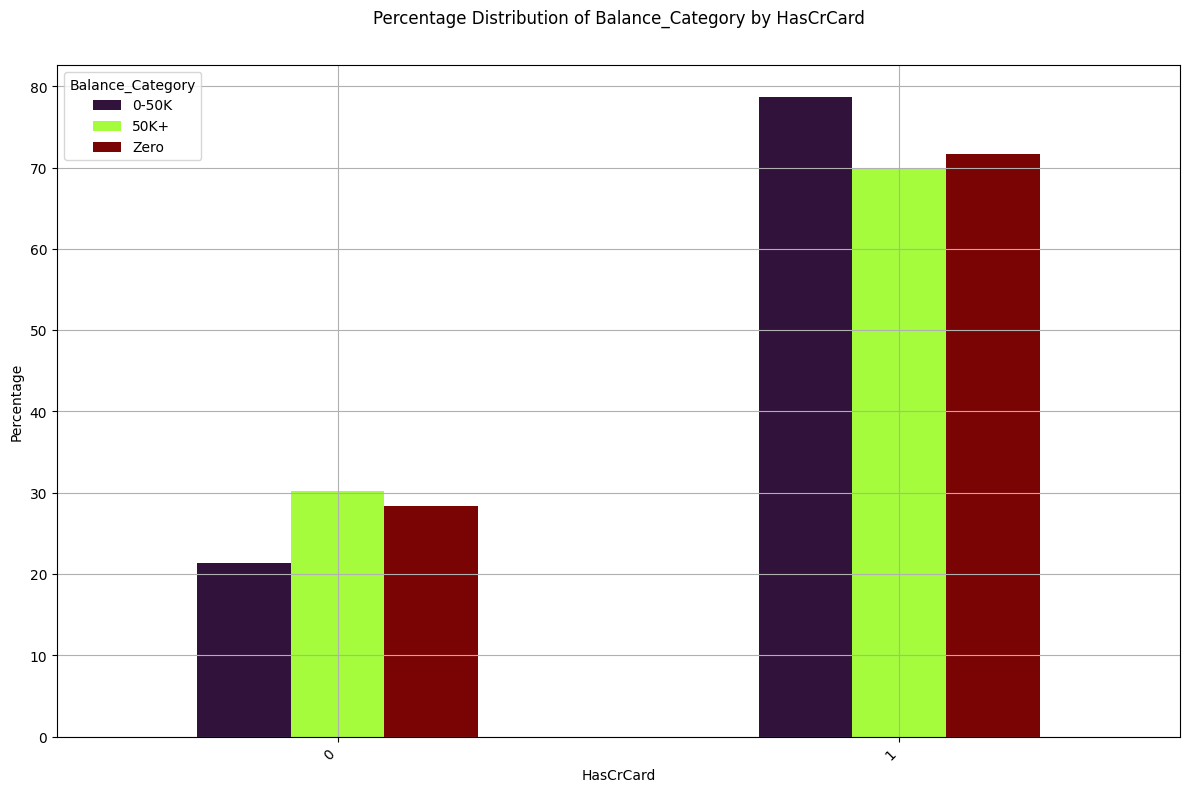


Percentage distribution for feature: Tenure

Tenure: 0 | Balance_Category: 0-50K | Percentage: 2.67%
Tenure: 1 | Balance_Category: 0-50K | Percentage: 10.67%
Tenure: 2 | Balance_Category: 0-50K | Percentage: 13.33%
Tenure: 3 | Balance_Category: 0-50K | Percentage: 16.00%
Tenure: 4 | Balance_Category: 0-50K | Percentage: 5.33%
Tenure: 5 | Balance_Category: 0-50K | Percentage: 9.33%
Tenure: 6 | Balance_Category: 0-50K | Percentage: 9.33%
Tenure: 7 | Balance_Category: 0-50K | Percentage: 9.33%
Tenure: 8 | Balance_Category: 0-50K | Percentage: 12.00%
Tenure: 9 | Balance_Category: 0-50K | Percentage: 6.67%
Tenure: 10 | Balance_Category: 0-50K | Percentage: 5.33%
Tenure: 0 | Balance_Category: 50K+ | Percentage: 4.34%
Tenure: 1 | Balance_Category: 50K+ | Percentage: 10.75%
Tenure: 2 | Balance_Category: 50K+ | Percentage: 10.40%
Tenure: 3 | Balance_Category: 50K+ | Percentage: 10.23%
Tenure: 4 | Balance_Category: 50K+ | Percentage: 9.77%
Tenure: 5 | Balance_Category: 50K+ | Percentage: 10.00%

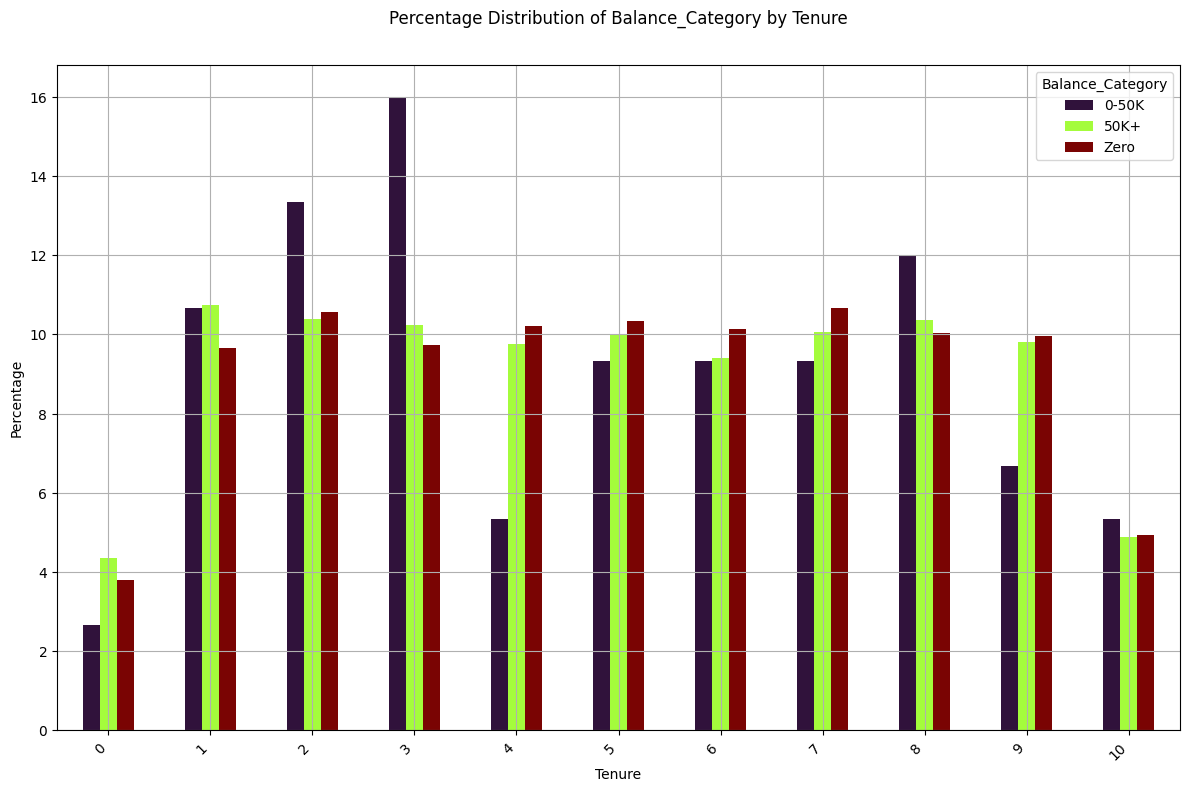


Percentage distribution for feature: Satisfaction Score

Satisfaction Score: 1 | Balance_Category: 0-50K | Percentage: 13.33%
Satisfaction Score: 2 | Balance_Category: 0-50K | Percentage: 17.33%
Satisfaction Score: 3 | Balance_Category: 0-50K | Percentage: 29.33%
Satisfaction Score: 4 | Balance_Category: 0-50K | Percentage: 24.00%
Satisfaction Score: 5 | Balance_Category: 0-50K | Percentage: 16.00%
Satisfaction Score: 1 | Balance_Category: 50K+ | Percentage: 19.63%
Satisfaction Score: 2 | Balance_Category: 50K+ | Percentage: 19.69%
Satisfaction Score: 3 | Balance_Category: 50K+ | Percentage: 20.43%
Satisfaction Score: 4 | Balance_Category: 50K+ | Percentage: 19.83%
Satisfaction Score: 5 | Balance_Category: 50K+ | Percentage: 20.42%
Satisfaction Score: 1 | Balance_Category: Zero | Percentage: 18.91%
Satisfaction Score: 2 | Balance_Category: Zero | Percentage: 20.98%
Satisfaction Score: 3 | Balance_Category: Zero | Percentage: 20.21%
Satisfaction Score: 4 | Balance_Category: Zero | Perc

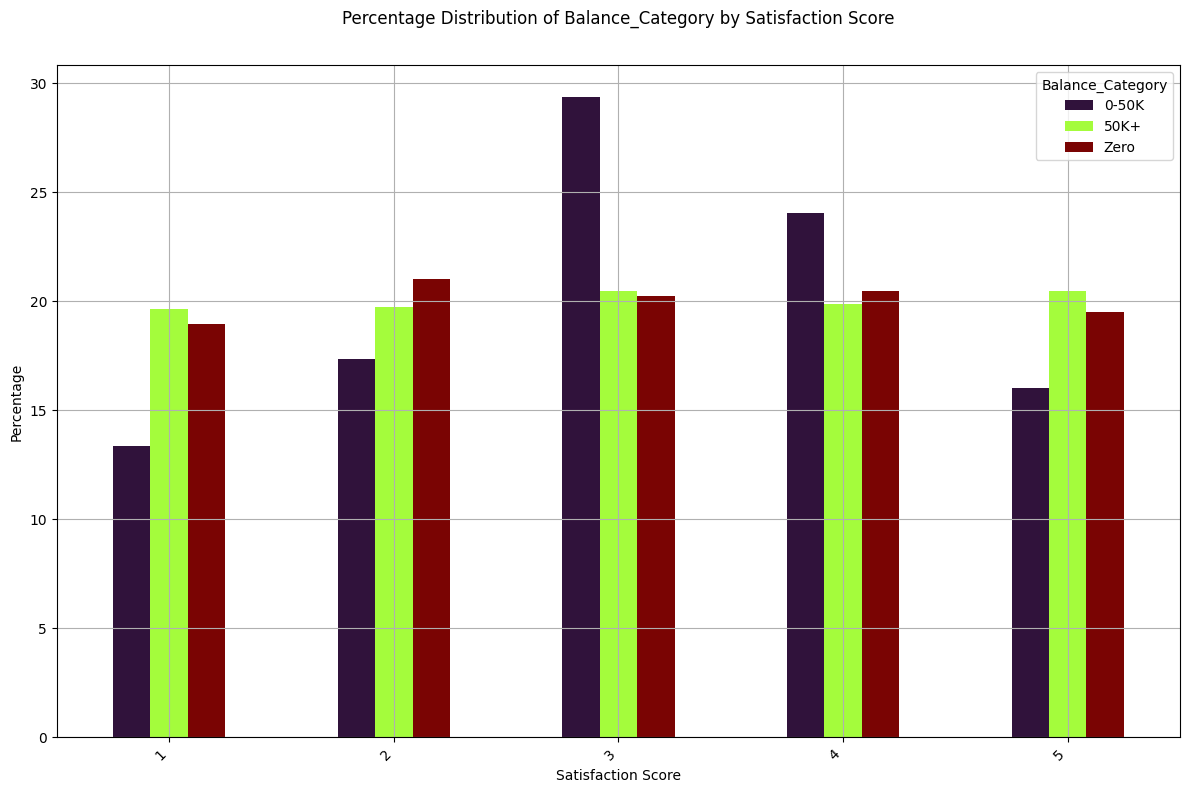


Percentage distribution for feature: Card Type

Card Type: DIAMOND | Balance_Category: 0-50K | Percentage: 25.33%
Card Type: GOLD | Balance_Category: 0-50K | Percentage: 24.00%
Card Type: PLATINUM | Balance_Category: 0-50K | Percentage: 25.33%
Card Type: SILVER | Balance_Category: 0-50K | Percentage: 25.33%
Card Type: DIAMOND | Balance_Category: 50K+ | Percentage: 25.82%
Card Type: GOLD | Balance_Category: 50K+ | Percentage: 25.19%
Card Type: PLATINUM | Balance_Category: 50K+ | Percentage: 24.67%
Card Type: SILVER | Balance_Category: 50K+ | Percentage: 24.32%
Card Type: DIAMOND | Balance_Category: Zero | Percentage: 23.75%
Card Type: GOLD | Balance_Category: Zero | Percentage: 24.74%
Card Type: PLATINUM | Balance_Category: Zero | Percentage: 25.44%
Card Type: SILVER | Balance_Category: Zero | Percentage: 26.07%


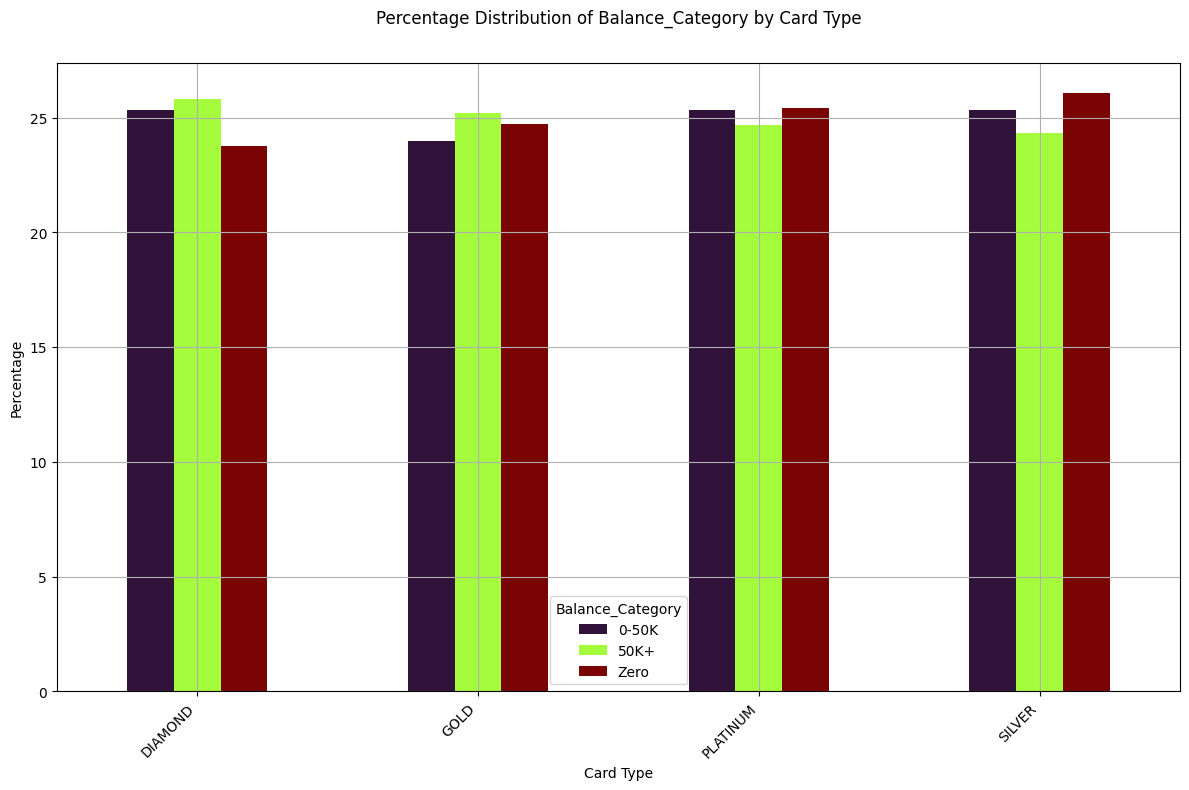

In [32]:
Balance_cat_features = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'Complain', 
                        'HasCrCard', 'Tenure', 'Satisfaction Score', 'Card Type']

target_feature = 'Balance_Category'

for feature in Balance_cat_features:
    grouped_df = data.groupby([target_feature, feature]).size().reset_index(name='count')
    total_counts = grouped_df.groupby(target_feature)['count'].sum().reset_index(name='total_count')
    
    merged_df = pd.merge(grouped_df, total_counts, on=target_feature)
    merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100
    
    print(f"\n{'='*50}")
    print(f"Percentage distribution for feature: {feature}")
    print(f"{'='*50}\n")
    
    for idx, row in merged_df.iterrows():
        print(f"{feature}: {row[feature]} | {target_feature}: {row[target_feature]} | Percentage: {row['percentage']:.2f}%")
    
    pivot_df = merged_df.pivot(index=feature, columns=target_feature, values='percentage')
    
    pivot_df.plot(kind='bar',figsize=(12, 8), colormap='turbo')
    plt.title(f'Percentage Distribution of {target_feature} by {feature}', y=1.05)
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title=target_feature)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [33]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Age_LogTransformed', 'Age_BoxCoxTransformed', 'Balance_Category'],
      dtype='object')

In [34]:
trans_data = data.drop(['Age_LogTransformed', 'Age', 'Balance', 'Complain'], axis=1)

"""The "Complain" feature was dropped due to its near-perfect correlation (correlation coefficient ~ 1)
 with the target variable. Including it would lead to data leakage, as it directly reveals the outcome,
 causing the model to overfit and not generalize well to new data. Removing this feature ensures that 
 the model learns from other features and remains robust in real-world scenarios."""


'The "Complain" feature was dropped due to its near-perfect correlation (correlation coefficient ~ 1)\n with the target variable. Including it would lead to data leakage, as it directly reveals the outcome,\n causing the model to overfit and not generalize well to new data. Removing this feature ensures that \n the model learns from other features and remains robust in real-world scenarios.'

In [35]:
print(trans_data.shape, trans_data.columns)

(10000, 14) Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Satisfaction Score', 'Card Type', 'Point Earned',
       'Age_BoxCoxTransformed', 'Balance_Category'],
      dtype='object')


In [36]:
trans_data['Balance_Category'] = trans_data['Balance_Category'].astype('object')

In [37]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            10000 non-null  int64  
 1   Geography              10000 non-null  object 
 2   Gender                 10000 non-null  object 
 3   Tenure                 10000 non-null  int64  
 4   NumOfProducts          10000 non-null  int64  
 5   HasCrCard              10000 non-null  int64  
 6   IsActiveMember         10000 non-null  int64  
 7   EstimatedSalary        10000 non-null  float64
 8   Exited                 10000 non-null  int64  
 9   Satisfaction Score     10000 non-null  int64  
 10  Card Type              10000 non-null  object 
 11  Point Earned           10000 non-null  int64  
 12  Age_BoxCoxTransformed  10000 non-null  float64
 13  Balance_Category       10000 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ M

In [38]:
# Encoding the object features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

obj_features = ['Geography', 'Gender', 'Card Type', 'Balance_Category']
label_encoder = LabelEncoder()

for col in obj_features:
    unique_values = trans_data[col].nunique()

    if unique_values == 2:
        trans_data[col] = label_encoder.fit_transform(trans_data[col])
    else:
        trans_data = pd.get_dummies(trans_data, columns=[col])

trans_data.head()


,CreditScore,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Age_BoxCoxTransformed,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Balance_Category_0-50K,Balance_Category_50K+,Balance_Category_Zero
0,619,0,2,1,1,1,101348.88,1,2,464,2.530867,True,False,False,True,False,False,False,False,False,True
1,608,0,1,1,0,1,112542.58,0,3,456,2.520415,False,False,True,True,False,False,False,False,True,False
2,502,0,8,3,1,0,113931.57,1,3,377,2.530867,True,False,False,True,False,False,False,False,True,False
3,699,0,1,2,0,0,93826.63,0,5,350,2.498541,True,False,False,False,True,False,False,False,False,True
4,850,0,2,1,1,1,79084.10,0,5,425,2.541019,False,False,True,False,True,False,False,False,True,False


In [39]:
#splitting the data
from sklearn.model_selection import train_test_split

X = trans_data.drop('Exited', axis=1)  
y = trans_data['Exited']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 20) (8000,)
(2000, 20) (2000,)


In [40]:
#scalling the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [41]:
#fitting 4 models as base ones(Benchmarks)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the models on the training data
logistic_model.fit(X_train_transformed, y_train)
random_forest_model.fit(X_train_transformed, y_train)
svm_model.fit(X_train_transformed, y_train)
xgb_model.fit(X_train_transformed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [42]:
# Predict on the test set
logistic_preds = logistic_model.predict(X_test_transformed)
random_forest_preds = random_forest_model.predict(X_test_transformed)
svm_preds = svm_model.predict(X_test_transformed)
xgb_preds = xgb_model.predict(X_test_transformed)

In [43]:
# We will be using Precision-Recall curve and score as they are more informative for imbalanced datasets like churn prediction, 
# they focus on the performance of the model with respect to the minority class (churned customers).

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, logistic_preds))
print("Classification Report:\n", classification_report(y_test, logistic_preds))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, random_forest_preds))
print("Classification Report:\n", classification_report(y_test, random_forest_preds))


# Evaluate Support Vector Machines
print("Support Vector Machines Performance:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))

# Evaluate XGBoost
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

Logistic Regression Performance:
Accuracy: 0.817
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1592
           1       0.64      0.24      0.34       408

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000


Random Forest Performance:
Accuracy: 0.8725
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1592
           1       0.82      0.48      0.61       408

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000

Support Vector Machines Performance:
Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1592
           1      

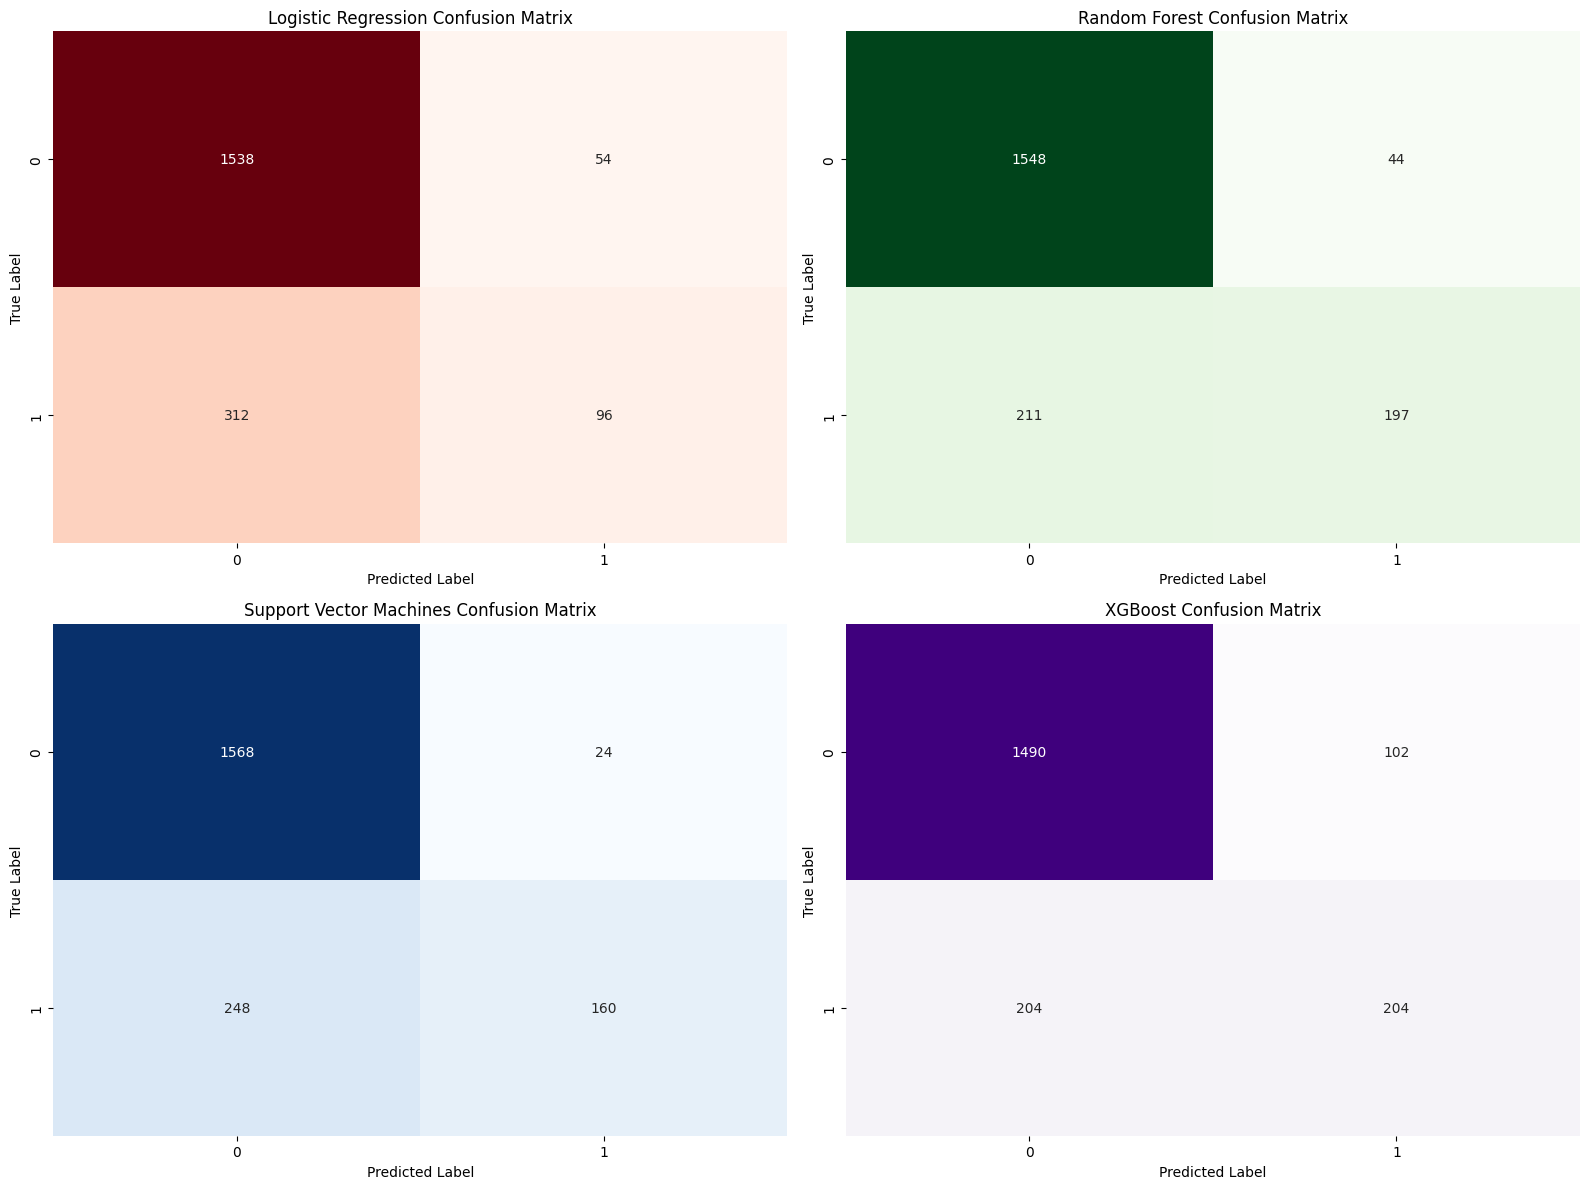

In [44]:
# Confusion matrices for each model
logistic_cm = confusion_matrix(y_test, logistic_preds)
random_forest_cm = confusion_matrix(y_test, random_forest_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
xgboost_cm = confusion_matrix(y_test, xgb_preds)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Support Vector Machines Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

sns.heatmap(xgboost_cm, annot=True, fmt='d', cmap='Purples', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('XGBoost Confusion Matrix')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Average Precision for Logistic Regression model is 0.51
Average Precision for Random Forest model is 0.69
Average Precision for Support Vector Machine model is 0.68
Average Precision for XGBoost model is 0.67


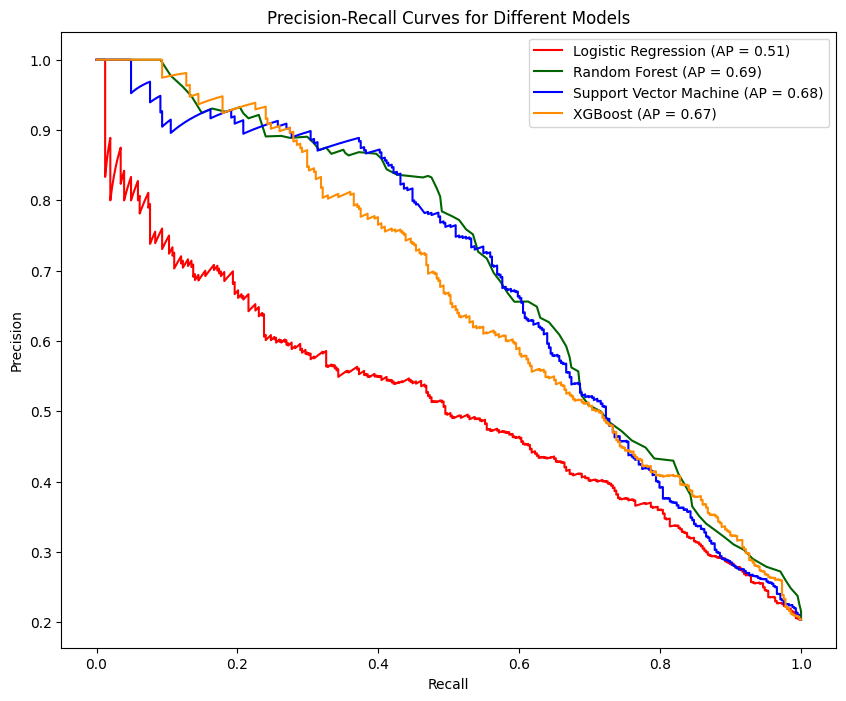

In [45]:
# Calculate Precision-Recall curve and Average Precision for each model
logistic_probs = logistic_model.predict_proba(X_test_transformed)[:, 1] 
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_probs)
logistic_ap = average_precision_score(y_test, logistic_probs, average= 'weighted')
print(f'Average Precision for Logistic Regression model is {logistic_ap:.2f}')

random_forest_probs = random_forest_model.predict_proba(X_test_transformed)[:, 1]  
random_forest_precision, random_forest_recall, _ = precision_recall_curve(y_test, random_forest_probs)
random_forest_ap = average_precision_score(y_test, random_forest_probs, average= 'weighted')
print(f'Average Precision for Random Forest model is {random_forest_ap:.2f}')

svm_probs = svm_model.predict_proba(X_test_transformed)[:, 1] 
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_ap = average_precision_score(y_test, svm_probs, average= 'weighted')
print(f'Average Precision for Support Vector Machine model is {svm_ap:.2f}')

xgb_probs = xgb_model.predict_proba(X_test_transformed)[:, 1]
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_ap = average_precision_score(y_test, xgb_probs, average= 'weighted')
print(f'Average Precision for XGBoost model is {xgb_ap:.2f}')

# Plot all Precision-Recall curves in a single figure
plt.figure(figsize=(10, 8))

plt.plot(logistic_recall, logistic_precision, label=f'Logistic Regression (AP = {logistic_ap:.2f})', color='red')
plt.plot(random_forest_recall, random_forest_precision, label=f'Random Forest (AP = {random_forest_ap:.2f})', color='darkgreen')
plt.plot(svm_recall, svm_precision, label=f'Support Vector Machine (AP = {svm_ap:.2f})', color='blue')
plt.plot(xgb_recall, xgb_precision, label=f'XGBoost (AP = {xgb_ap:.2f})', color='darkorange')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.show()


In [46]:
# As the results indicate that SVM, RF and XGB give the better results compared to lr, we will cintinue fine tuning them 
from sklearn.model_selection import GridSearchCV

In [47]:
# Define SVM model and parameters for GridSearch
svm_model = SVC(probability=True, random_state=42)  
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight':[{0:1,1:2}, {0:1,1:4}, {0:1,1:6}]
}

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=10, n_jobs=-1, verbose=2, scoring='average_precision')
svm_grid_search.fit(X_train_transformed, y_train)

# Best XGBoost Model
svm_grid_model = svm_grid_search.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=poly; total time=  15.5s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=poly; total time=  14.2s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=poly; total time=  14.0s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=  17.3s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  22.4s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  22.0s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  23.2s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=  14.4s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=  14.5s
[CV] END C=0.1, class_weight={0: 1, 1: 2}, gamma=aut

In [48]:
# Define Random Forest model and parameters for GridSearch
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}]
}

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=10, n_jobs=-1, verbose=2, scoring='average_precision')
rf_grid_search.fit(X_train_transformed, y_train)

# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_


Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=  19.7s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=  20.6s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=  20.2s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  16.9s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  18.0s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=  17.6s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=  42.4s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=  38.9s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=  43.7s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=  20.4s
[CV] END C=10, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmo

In [49]:
# Define XGBoost model and parameters for GridSearch
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective= 'binary:logistic')
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 8],
    'learning_rate': [0.05, 0.1, 0.3],
    'scale_pos_weight': [2, 4, 6]
}

# GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=10, n_jobs=-1, verbose=2, scoring='average_precision')
xgb_grid_search.fit(X_train_transformed, y_train)

# Best XGBoost Model
best_xgb_model = xgb_grid_search.best_estimator_

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END class_weight={0: 1, 1: 6}, criterion=gini, max_depth=30, n_estimators=300; total time=   4.6s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=100; total time=   1.4s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=100; total time=   1.4s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=200; total time=   2.8s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=200; total time=   3.1s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=300; total time=   4.5s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=300; total time=   4.5s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=10, n_estimators=300; total time=   4.7s
[CV] END class_weight={0: 1, 1: 6}, criterion=entropy, max_depth=20, n_estimators=100; total

In [50]:
# Predictions and Evaluation for Support Vector Machines
svm_test_score = svm_grid_model.score(X_test_transformed, y_test)

print("Support Vector Machines Performance:")
print(f"Best Params: {svm_grid_search.best_params_}")
print(f"Best Score (Cross-Validation): {svm_grid_search.best_score_}")
print("Test Score:", svm_test_score)
print("Test Classification Report:")
print(classification_report(y_test, svm_grid_model.predict(X_test_transformed)))


# Predictions and Evaluation for Random Forest
rf_test_score = best_rf_model.score(X_test_transformed, y_test)

print("Random Forest Performance:")
print(f"Best Params: {rf_grid_search.best_params_}")
print(f"Best Score (Cross-Validation): {rf_grid_search.best_score_}")
print("Test Score:", rf_test_score)
print("Test Classification Report:")
print(classification_report(y_test, best_rf_model.predict(X_test_transformed)))


# Predictions and Evaluation for XGBoost
xgb_test_score = best_xgb_model.score(X_test_transformed, y_test)

print("XGBoost Performance:")
print(f"Best Params: {xgb_grid_search.best_params_}")
print(f"Best Score (Cross-Validation): {xgb_grid_search.best_score_}")
print("Test Score:", xgb_test_score)
print("Test Classification Report:")
print(classification_report(y_test, best_xgb_model.predict(X_test_transformed)))


Support Vector Machines Performance:
Best Params: {'C': 1, 'class_weight': {0: 1, 1: 2}, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score (Cross-Validation): 0.6333558914049408
Test Score: 0.8555
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1592
           1       0.66      0.61      0.63       408

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest Performance:
Best Params: {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Best Score (Cross-Validation): 0.6809972870769728
Test Score: 0.864
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1592
           1       0.72      0.54      0.62       408

    accuracy                           0.86      2000
   ma

Average Precision for Support Vector Machine model is 0.68
Average Precision for Random Forest model is 0.71
Average Precision for XGBoost model is 0.72


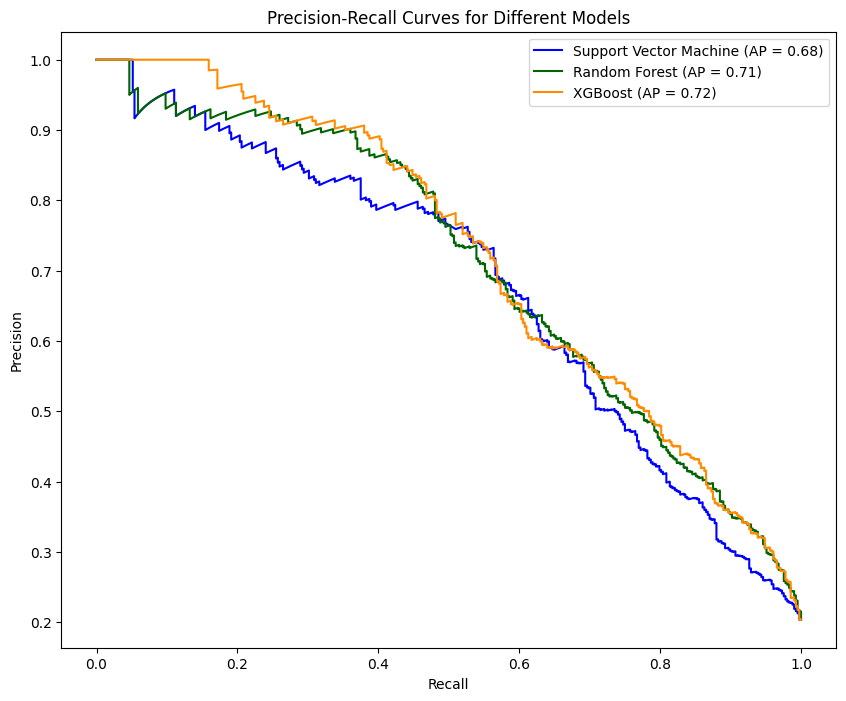

In [51]:
# Calculate Precision-Recall curve and Average Precision for each model

# Support Vector Machine
svm_probs = svm_grid_model.predict_proba(X_test_transformed)[:, 1]
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_ap = average_precision_score(y_test, svm_probs, average='weighted')
print(f'Average Precision for Support Vector Machine model is {svm_ap:.2f}')

# Random Forest
rf_probs = best_rf_model.predict_proba(X_test_transformed)[:, 1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_ap = average_precision_score(y_test, rf_probs, average='weighted')
print(f'Average Precision for Random Forest model is {rf_ap:.2f}')

# XGBoost
xgb_probs = best_xgb_model.predict_proba(X_test_transformed)[:, 1]
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_ap = average_precision_score(y_test, xgb_probs, average='weighted')
print(f'Average Precision for XGBoost model is {xgb_ap:.2f}')

# Plot all Precision-Recall curves in a single figure
plt.figure(figsize=(10, 8))

plt.plot(svm_recall, svm_precision, label=f'Support Vector Machine (AP = {svm_ap:.2f})', color='blue')
plt.plot(rf_recall, rf_precision, label=f'Random Forest (AP = {rf_ap:.2f})', color='darkgreen')
plt.plot(xgb_recall, xgb_precision, label=f'XGBoost (AP = {xgb_ap:.2f})', color='darkorange')

# Add plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.show()


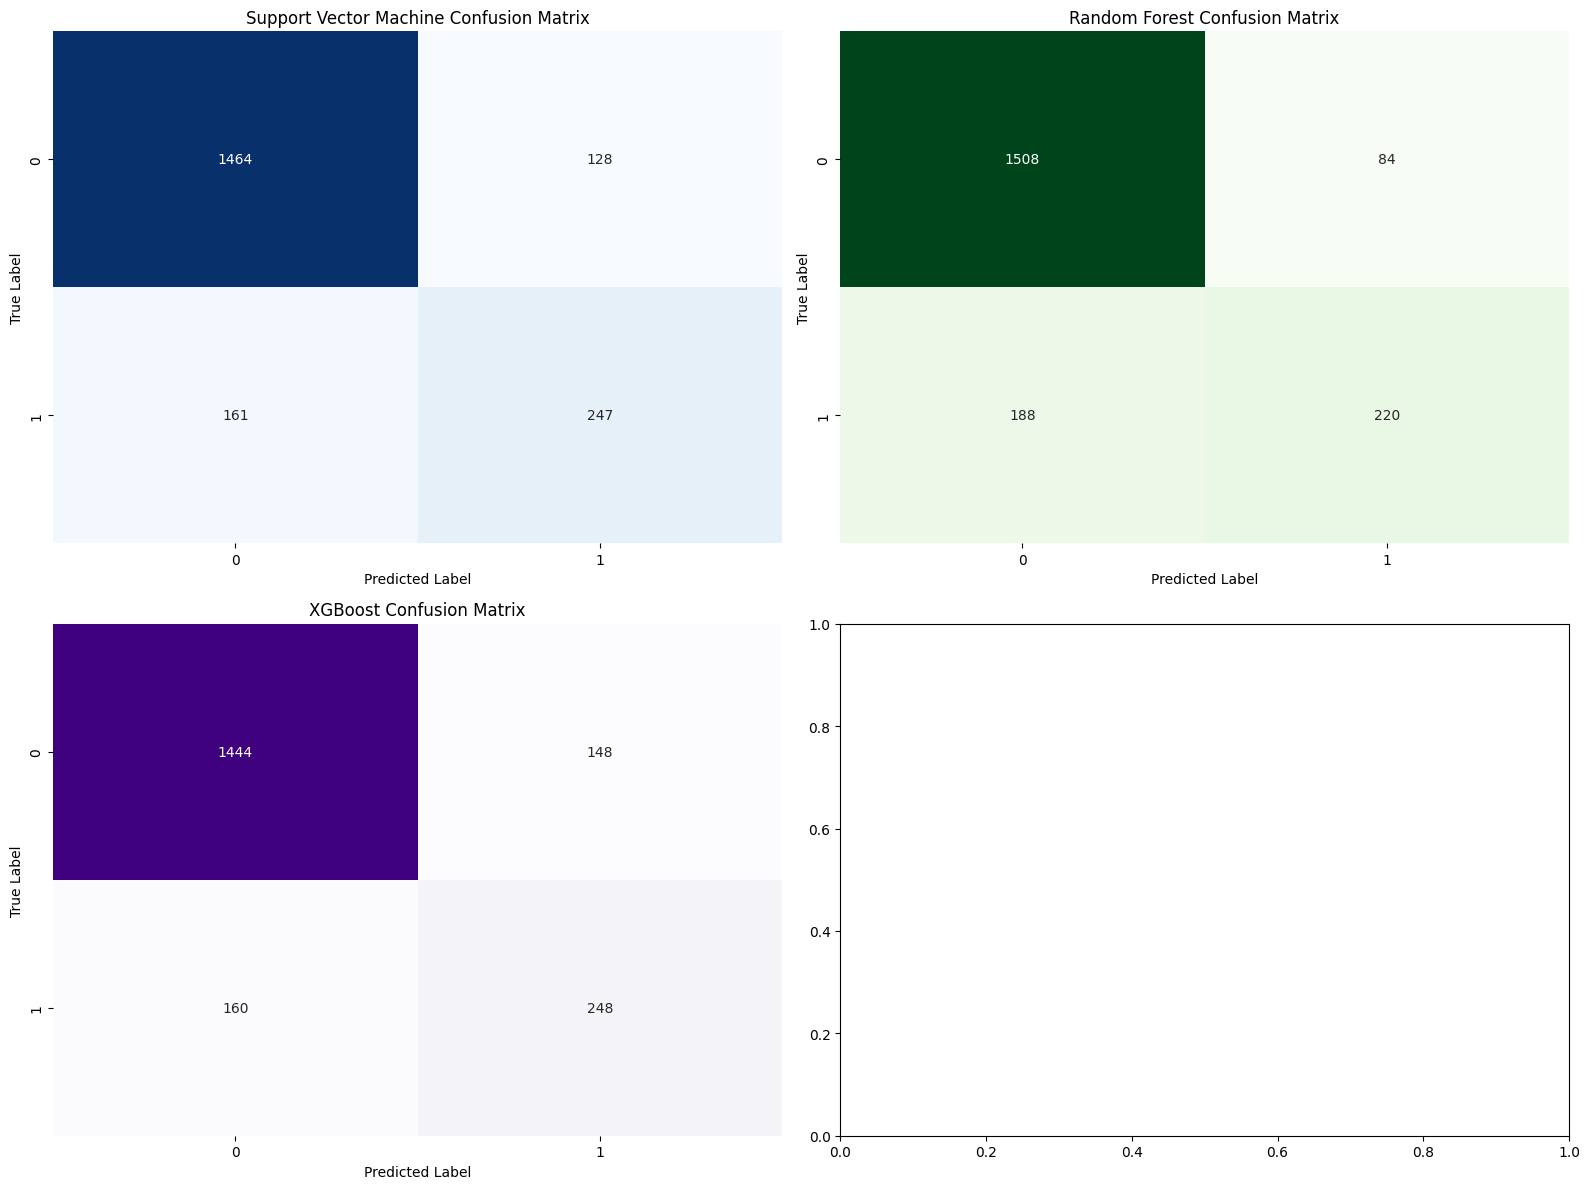

In [52]:
# Predictions for each model
svm_preds = svm_grid_model.predict(X_test_transformed)
rf_preds = best_rf_model.predict(X_test_transformed)
xgb_preds = best_xgb_model.predict(X_test_transformed)

# Confusion matrices for each model
svm_cm = confusion_matrix(y_test, svm_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
xgb_cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrices in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# SVM Confusion Matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Support Vector Machine Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

# XGBoost Confusion Matrix
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Purples', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('XGBoost Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()
